<a href="https://colab.research.google.com/github/mifta10/predicting_fifa_wc2022_winner_using_ML/blob/main/FIFA_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setting up Enviroment & Explore Dataset **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import os
import gc
import time
import warnings
from tqdm import tqdm
from itertools import combinations
import missingno
from termcolor import colored, cprint

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve



import tensorflow as tf
import tensorflow.keras as keras
import keras.layers as layers
import keras.callbacks as cb
from tensorflow.keras.utils import plot_model

# configurations
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_palette('dark')

SEED = 101
SEPARATOR = colored(200*'=', 'red')
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'IR Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France',
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany',
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia',
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']
tf.random.set_seed(SEED)
np.random.seed(101)

In [ ]:
#Read dataset here and print first five rows
df = pd.read_csv('/content/international_matches.csv')
df.head()


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Describe the statistical term of the variables
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [ ]:
#describe statistical term of variables includes object as well
df.select_dtypes(include='object').describe()

,date,home_team,away_team,home_team_continent,away_team_continent,tournament,city,country,shoot_out,home_team_result
count,23921,23921,23921,23921,23921,23921,23921,23921,23921,23921
unique,5550,211,211,6,6,82,1576,217,2,3
top,2012-02-29,Mexico,Zambia,Europe,Europe,Friendly,Doha,USA,No,Win
freq,66,316,243,7593,7359,8558,397,1003,23589,11761


In [ ]:
#Print the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [ ]:
#print data type of different variables in the dataset
df.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

**Quick Summary from above Findings**
1. there are many national (exceeds half dataset) have zero FIFA points.
2. max home team score = 31 which may be outlier so we need to check scores carefully.
3. max away team score = 21.
4. There are many NULLS in this dataset.

array([[<Axes: title={'center': 'home_team_fifa_rank'}>,
        <Axes: title={'center': 'away_team_fifa_rank'}>,
        <Axes: title={'center': 'home_team_total_fifa_points'}>,
        <Axes: title={'center': 'away_team_total_fifa_points'}>],
       [<Axes: title={'center': 'home_team_score'}>,
        <Axes: title={'center': 'away_team_score'}>,
        <Axes: title={'center': 'home_team_goalkeeper_score'}>,
        <Axes: title={'center': 'away_team_goalkeeper_score'}>],
       [<Axes: title={'center': 'home_team_mean_defense_score'}>,
        <Axes: title={'center': 'home_team_mean_offense_score'}>,
        <Axes: title={'center': 'home_team_mean_midfield_score'}>,
        <Axes: title={'center': 'away_team_mean_defense_score'}>],
       [<Axes: title={'center': 'away_team_mean_offense_score'}>,
        <Axes: title={'center': 'away_team_mean_midfield_score'}>,
        <Axes: >, <Axes: >]], dtype=object)

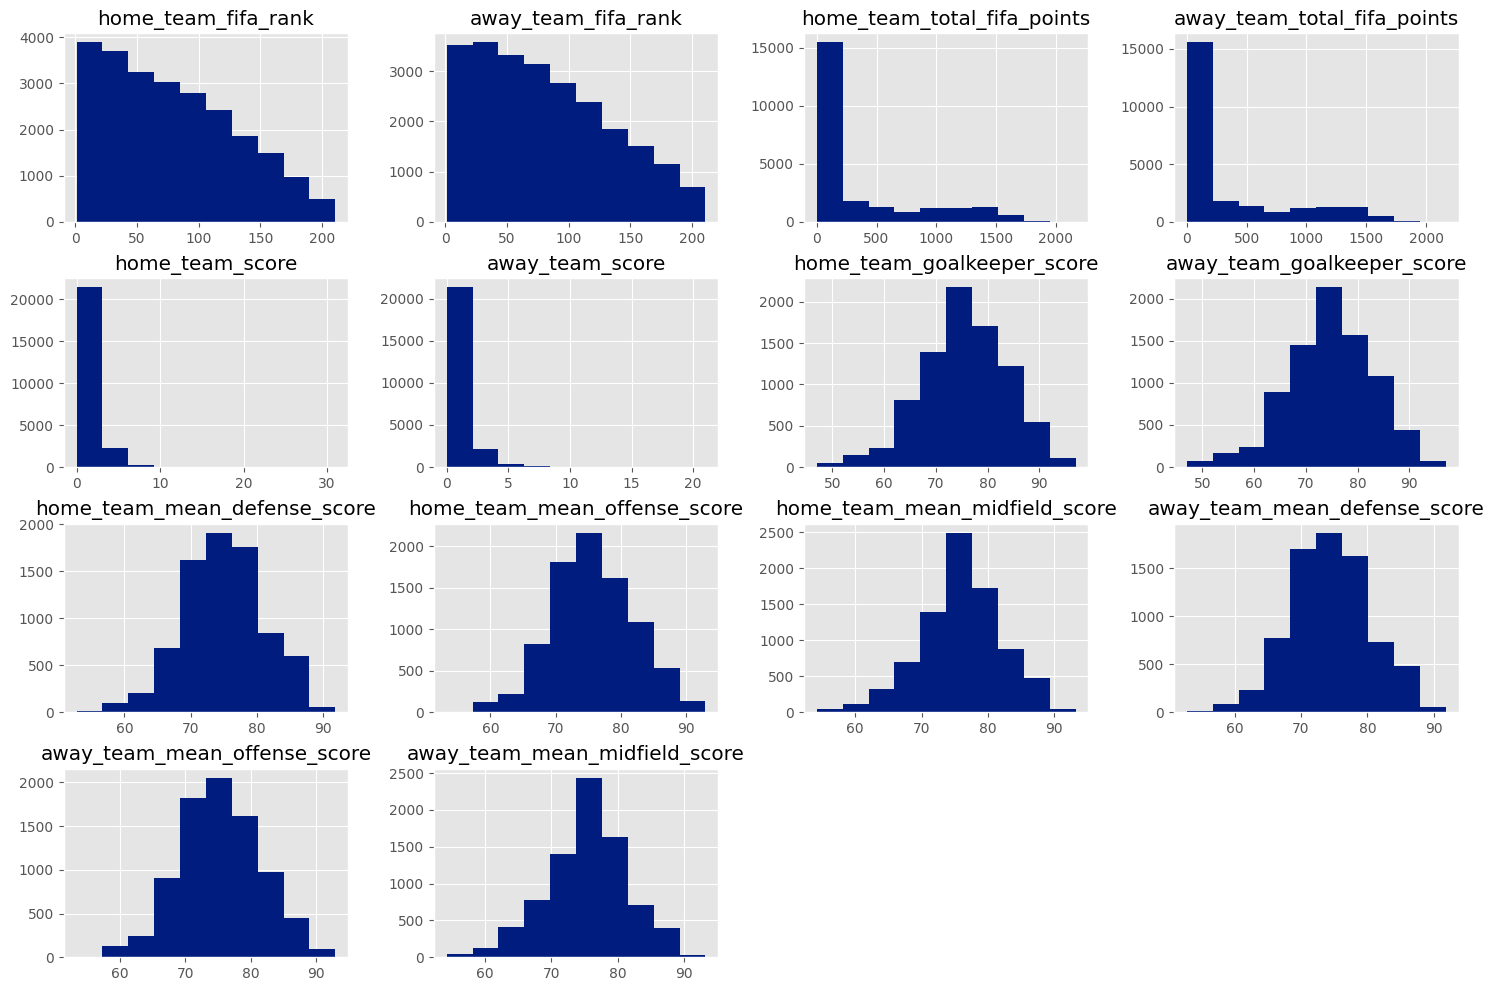

In [ ]:
df.hist(figsize=(18,12))

# **Preprocessing ⚙️**

In [ ]:
#Handling Missing values
df.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

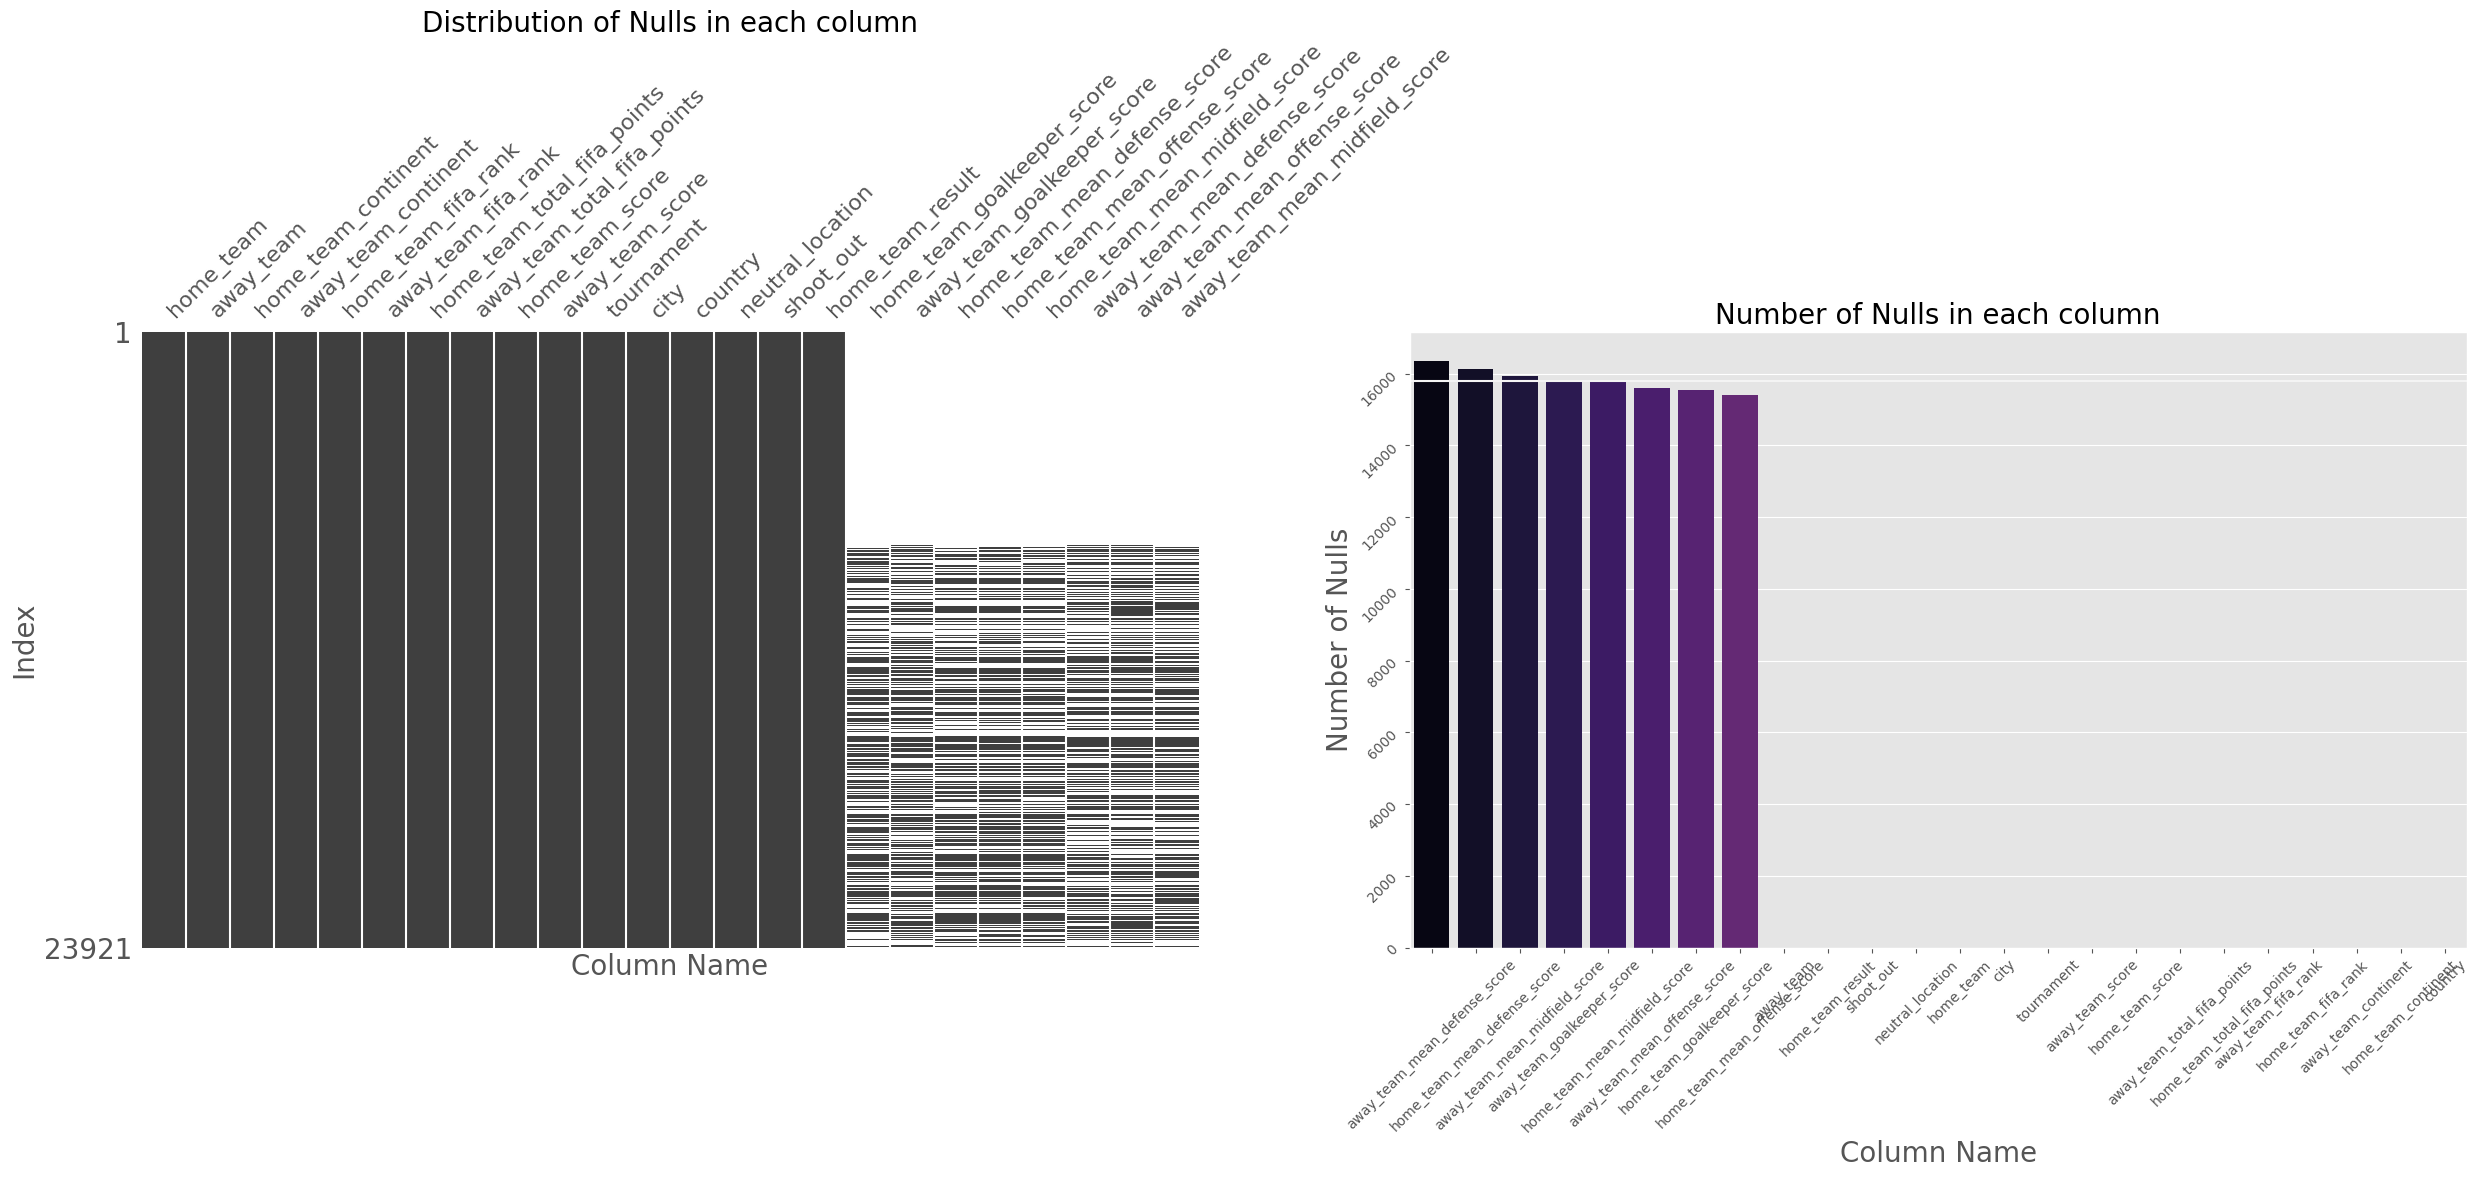

In [ ]:
#Handle Nulls
per_date = df.set_index('date').copy()
Nulls = per_date.isnull().sum().sort_values(ascending=False)
median = np.median(Nulls[Nulls>0].values)

fig, axs = plt.subplots(1, 2, figsize=(30, 8))
missingno.matrix(per_date, ax=axs[0])
axs[0].set_title('Distribution of Nulls in each column', size=20);axs[0].set_xlabel('Column Name', size=20);axs[0].set_ylabel('Index', size=20);

sns.barplot(x=Nulls.index, y=Nulls.values, ax=axs[1], palette='magma')
axs[1].tick_params(labelrotation=45)
axs[1].axhline(median, color='#f4f4f4')
axs[1].set_title('Number of Nulls in each column', size=20);axs[1].set_xlabel('Column Name', size=20);axs[1].set_ylabel('Number of Nulls', size=20);

In [ ]:
import plotly.graph_objects as go

df['year'] = pd.to_datetime(df['date']).dt.year
nulls_per_year = pd.pivot_table(df, index=['year'], aggfunc=lambda x: x.isnull().mean() / 0.08).sum(1).sort_index()

fig = go.Figure(data=[go.Scatter(
    x=nulls_per_year.index,
    y=nulls_per_year.values,
    mode='markers',
    marker=dict(color='#7F1431', size=10)  # Set the color and size of the markers
)])

fig.update_layout(
    xaxis={'title': {'text': 'Year', 'font': {'size': 10, 'color': '#7F1431'}}},
    yaxis={'title': {'text': 'Proportion of Nulls', 'font': {'size': 20, 'color': '#7F1431'}}},
    title={'text': "Percentage of Missing Each Year", 'font': {'size': 25}},
    plot_bgcolor='#FFFFFF',  # Set the background color of the plot
    paper_bgcolor='#F2F2F2'  # Set the background color of the paper
)

fig.show()


# Checking Duplicates

In [ ]:
#4.Checking for duplicated rows in a dataset after dropping the rows with missing values
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [date, home_team, away_team, home_team_continent, away_team_continent, home_team_fifa_rank, away_team_fifa_rank, home_team_total_fifa_points, away_team_total_fifa_points, home_team_score, away_team_score, tournament, city, country, neutral_location, shoot_out, home_team_result, home_team_goalkeeper_score, away_team_goalkeeper_score, home_team_mean_defense_score, home_team_mean_offense_score, home_team_mean_midfield_score, away_team_mean_defense_score, away_team_mean_offense_score, away_team_mean_midfield_score, year]
Index: []


# Outliers

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columns = df.select_dtypes(exclude='object').columns
n_cols = 2
n_rows = len(columns) // n_cols + 1

colors = ['#7F1431', '#FF5733', '#C70039', '#900C3F', '#581845']  # Specify custom colors for the box plots

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Box(x=df[col], name=col, marker=dict(color=colors[i % len(colors)])),
                  row=i // n_cols + 1, col=int(i % n_cols) + 1)

fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=1080)
fig.show()


In [ ]:
##Median Imputaion technique

#df['home_team_total_fifa_points'] = df['home_team_total_fifa_points'].replace(0, df['home_team_total_fifa_points'].median())
#df['away_team_total_fifa_points'] = df['away_team_total_fifa_points'].replace(0, df['away_team_total_fifa_points'].median())
#df.head()

In [ ]:
fig = make_subplots(2, 2, subplot_titles=['Home team points distribution', 'Away team points distribution', 'Home team points per year', 'Away team points per year'])
trace1 = go.Histogram(x=df['home_team_total_fifa_points'], name='Home Team')
fig.add_trace(trace1, row=1, col=1)
trace2 = go.Histogram(x=df['away_team_total_fifa_points'], name='Away Team')
fig.add_trace(trace2, row=1, col=2)


home_team_points_per_year = df.groupby('year')['home_team_total_fifa_points'].mean()
away_team_points_per_year = df.groupby('year')['away_team_total_fifa_points'].mean()


trace1 = go.Scatter(x=home_team_points_per_year.index, y=home_team_points_per_year.values, name='home')
fig.add_trace(trace1, 2, 1)
trace2 = go.Scatter(x=away_team_points_per_year.index, y=away_team_points_per_year.values, name='away')
fig.add_trace(trace2, 2, 2)

In [ ]:
%%time
home_indices = df.loc[df.home_team_total_fifa_points>0].groupby('home_team').groups
away_indices = df.loc[df.away_team_total_fifa_points>0].groupby('away_team').groups
SIGMA = 0.5
gaussian = lambda x : 1 / (np.sqrt(2*np.pi) * SIGMA) * np.exp(- np.power(x, 2) / (2*np.power(SIGMA, 2)))

def get_points(row_idx:float, home:bool=True) -> float:
    '''
    Args:
        row_idx: index of row that have zero total fifa points.
        home: boolen flag to indicate whether to modify home or away team.

    Returns:
        weighted_points: new fifa point of this team.

    '''
    row = df.iloc[row_idx]
    year=row.year
    if home:
        team = row.home_team
        indices = home_indices
    else:
        team = row.away_team
        indices = away_indices

    years_points = df.loc[indices[team], ['year', 'home_team_total_fifa_points']].values.reshape(-1, 2)
    years = years_points[:, 0]
    points = years_points[:, 1]
    time_distance = years - year
    weights = gaussian(time_distance)
    weights = weights / np.sum(weights)
    weighted_points = weights * points
    return weighted_points.mean()

for year in range(2010, 1993, -1):
    home_zero_points_rows = pd.Series(df.loc[(df['home_team_total_fifa_points']==0).values & (df['year']==year).values].index)
    home = home_zero_points_rows.apply(get_points)
    df.loc[(df['home_team_total_fifa_points']==0).values & (df['year']==year).values, 'home_team_total_fifa_points'] = home.values

    away_zero_points_rows = pd.Series(df.loc[(df['away_team_total_fifa_points']==0).values & (df['year']==year).values].index)
    away = away_zero_points_rows.apply(lambda x : get_points(x, home=False))
    df.loc[(df['away_team_total_fifa_points']==0).values & (df['year']==year).values, 'away_team_total_fifa_points'] = away.values

CPU times: user 46.7 s, sys: 355 ms, total: 47 s
Wall time: 1min 2s


In [ ]:
#from sklearn.impute import KNNImputer

# Identify columns with outliers
#columns_with_outliers = ['home_team_total_fifa_points', 'away_team_total_fifa_points']

# Prepare the feature data for KNN imputation
#features = df[columns_with_outliers]

# Perform KNN imputation
#imputer = KNNImputer(n_neighbors=100)  # You can adjust the number of neighbors as per your requirement
#imputed_values = imputer.fit_transform(features)

# Update the DataFrame with imputed values
#df[columns_with_outliers] = imputed_values

# Verify the imputed DataFrame
#df.head()

###Selected Gaussian Kernel Equation

In [ ]:
#Checking values after imputation
#Describe the statistical term of the variables
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
count,23921.000000,23921.000000,23916.000000,23916.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000,23921.000000
mean,77.854688,80.797375,328.528853,320.649626,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143,2008.277998
std,52.355225,53.232902,497.617776,487.702009,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573,8.029469
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000,1993.000000
25%,33.000000,36.000000,7.000000,7.014085,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000,2001.000000
50%,71.000000,73.000000,13.250000,13.437158,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000,2008.000000
75%,115.000000,119.000000,548.000000,523.250000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000,2015.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000,2022.000000


In [ ]:
fig = make_subplots(2, 2, subplot_titles=['Home team points distribution', 'Away team points distribution', 'Home team points per year', 'Away team points per year'])
trace1 = go.Box(x=df['home_team_total_fifa_points'], name='Home Team')
fig.add_trace(trace1, row=1, col=1)
trace2 = go.Box(x=df['away_team_total_fifa_points'], name='Away Team')
fig.add_trace(trace2, row=1, col=2)


home_team_points_per_year = df.groupby('year')['home_team_total_fifa_points'].mean()
away_team_points_per_year = df.groupby('year')['away_team_total_fifa_points'].mean()


trace1 = go.Box(x=home_team_points_per_year.index, y=home_team_points_per_year.values, name='home')
fig.add_trace(trace1, 2, 1)
trace2 = go.Box(x=away_team_points_per_year.index, y=away_team_points_per_year.values, name='away')
fig.add_trace(trace2, 2, 2)

# **Data Analysis 🔬**

Visualizing something needed here. Will do it later

In [ ]:
def mode(arr):
    srtd_lst, cnt = np.unique(arr, return_counts=True)
    return srtd_lst[np.argmax(cnt)]

# Home win | draw | lose
df['home_win'] = df['home_team_result'].apply(lambda x : x=='Win')
df['home_draw'] = df['home_team_result'].apply(lambda x : x=='Draw')
df['home_lose'] = df['home_team_result'].apply(lambda x : x=='Lose')

# per team table
per_team = pd.DataFrame(df.groupby('home_team')['home_win'].sum())
per_team['home_draw'] = df.groupby('home_team')['home_draw'].sum().values
per_team['home_loss'] = df.groupby('home_team')['home_lose'].sum().values

per_team['away_win']  = df.groupby('away_team')['home_lose'].sum().values
per_team['away_draw']  = df.groupby('away_team')['home_draw'].sum().values
per_team['away_win']  = df.groupby('away_team')['home_win'].sum().values

per_team['continent'] = df.groupby('home_team')['home_team_continent'].apply(mode).values

per_team['avg_FIFA_points'] = (df.groupby('home_team')['home_team_total_fifa_points'].mean().values + df.groupby('away_team')['away_team_total_fifa_points'].mean().values) / 2
per_team['median_FIFA_rank'] = df.groupby('home_team')['home_team_fifa_rank'].median().values

per_team['home_goal_scored'] = df.groupby(['home_team'])['home_team_score'].sum()
per_team['home_goal_conceded'] = df.groupby(['home_team'])['away_team_score'].sum()
per_team['away_goal_scored'] = df.groupby(['away_team'])['away_team_score'].sum()
per_team['away_goal_conceded'] = df.groupby(['away_team'])['home_team_score'].sum()

per_team.head()

,home_win,home_draw,home_loss,away_win,away_draw,continent,avg_FIFA_points,median_FIFA_rank,home_goal_scored,home_goal_conceded,away_goal_scored,away_goal_conceded
home_team,,,,,,,,,,,,
Afghanistan,16,8,12,33,17,Asia,275.383033,150.5,51,53,66,126
Albania,52,30,49,66,24,Europe,383.005653,78.0,156,143,98,176
Algeria,91,30,38,51,41,Africa,437.291841,55.0,297,143,149,162
American Samoa,3,1,13,13,0,Oceania,116.570028,203.0,17,94,5,119
Andorra,10,13,74,82,9,Europe,257.668938,156.0,36,199,24,275


In [ ]:
df.to_csv('matches.csv', index=False)

In [ ]:
def get_tournament_rank(tournament):
    if ('FIFA World Cup' in tournament or 'Confederations' in tournament):
        return 'International'
    elif (tournament == 'Friendly'):
        return tournament
    elif ('UEFA' in tournament):
        return 'Europe'
    elif ('African' in tournament):
        return 'Africa'
    elif ('AFC' in tournament):
        return 'Asia'
    elif ('CONCACAF' in tournament):
        return 'North America'
    elif ('Copa' in tournament):
        return 'South America'
    else :
        return 'Other'

columns_to_drop = ['home_team', 'away_team', 'home_team_score', 'away_team_score', 'date', 'tournament', 'city', 'country', 'neutral_location', 'home_win', 'home_draw', 'home_lose',
                   'tournament', 'tournament_rank', 'home_team_result',
                   'home_team_continent', 'away_team_continent', 'year']


df['total_fifa_points_diff'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['total_fifa_points_sum'] = df['home_team_total_fifa_points'] + df['away_team_total_fifa_points']
df['fifa_rank_diff'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['fifa_rank_sum'] = df['home_team_fifa_rank'] + df['away_team_fifa_rank']
df['tournament_rank'] = df['tournament'].apply(get_tournament_rank)

# Encode categorical features
# 1. trounament rank
tournament_rank_encoder = OneHotEncoder(drop='first').fit(df['tournament_rank'].values.reshape(-1, 1))
tournament_rank = tournament_rank_encoder.transform(df['tournament_rank'].values.reshape(-1, 1)).toarray()
tournament_rank = pd.DataFrame(tournament_rank, columns=['tournament' + str(i) for i in range(tournament_rank.shape[1])])
df = pd.concat([df, tournament_rank], axis=1)

# 2. shoot_out
df['shoot_out'] = (df['shoot_out']=='Yes').astype(int)

# 3. continent
continent_encoder = OrdinalEncoder()
continent_encoder.fit(df['home_team_continent'].values.reshape(-1, 1))
df['home_team_continent_encoded'] = continent_encoder.transform(df['home_team_continent'].values.reshape(-1, 1))
df['away_team_continent_encoded'] = continent_encoder.transform(df['away_team_continent'].values.reshape(-1, 1))


# fill nulls in score columns -> I will fill these nulls using bfill (as data is sorted at time, so goal keeper will take score of his next match)
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')




In [ ]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year,home_win,home_draw,home_lose,total_fifa_points_diff,total_fifa_points_sum,fifa_rank_diff,fifa_rank_sum,tournament_rank,tournament0,tournament1,tournament2,tournament3,tournament4,tournament5,tournament6,home_team_continent_encoded,away_team_continent_encoded
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0.0,0.0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,0,Win,93.0,70.0,85.0,93.0,87.0,80.2,79.7,81.8,1993,True,False,False,0.0,0.0,37,81,International,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,5.0
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0.0,0.0,1,1,Friendly,Maceió,Brazil,False,0,Draw,93.0,70.0,85.0,93.0,87.0,80.2,79.7,81.8,1993,False,True,False,0.0,0.0,-6,22,Friendly,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0.0,0.0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,0,Win,93.0,70.0,85.0,93.0,87.0,80.2,79.7,81.8,1993,True,False,False,0.0,0.0,-59,129,International,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,5.0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0.0,0.0,1,0,Friendly,Conakry,Guinea,False,0,Win,93.0,70.0,85.0,93.0,87.0,80.2,79.7,81.8,1993,True,False,False,0.0,0.0,-21,151,Friendly,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0.0,0.0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,0,Lose,93.0,70.0,85.0,93.0,87.0,80.2,79.7,81.8,1993,False,False,True,0.0,0.0,62,72,International,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932.0,1040.0,2,1,UEFA Nations League,Chișinău,Moldova,False,0,Win,65.0,65.0,75.5,76.7,78.2,75.5,76.0,78.2,2022,True,False,False,-108.0,1972.0,27,333,Europe,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895.0,1105.0,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,0,Lose,79.0,65.0,75.5,76.7,78.2,75.5,76.0,78.2,2022,False,False,True,-210.0,2000.0,57,327,Europe,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526.0,1387.0,0,0,Kirin Cup,Suita,Japan,True,1,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2,2022,False,False,True,139.0,2913.0,-32,88,Other,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553.0,1499.0,0,3,Kirin Cup,Suita,Japan,False,0,Lose,73.0,74.0,75.2,75.0,77.5,70.8,72.3,74.0,2022,False,False,True,54.0,3052.0,-12,58,Other,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X = df.drop(columns_to_drop, axis=1)
y = (df['home_team_result'] == 'Win').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=101)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19136, 26)
(19136,)
(4785, 26)
(4785,)


# **Model Training**

In [ ]:
def evaluate(y_pred, y_true):
    print(f"Accuracy score: {colored(accuracy_score(y_pred, y_true)*100, 'red')}")
    cm = confusion_matrix(y_pred, y_true)
    sns.heatmap(cm, annot=True, fmt='.2f', center=True)
    plt.show()
    print(classification_report(y_pred, y_true))

    fpr, tpr, thresholds = roc_curve(y_pred, y_true)
    print(f'AUC: {colored(auc(fpr, tpr) * 100, "red")}')

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

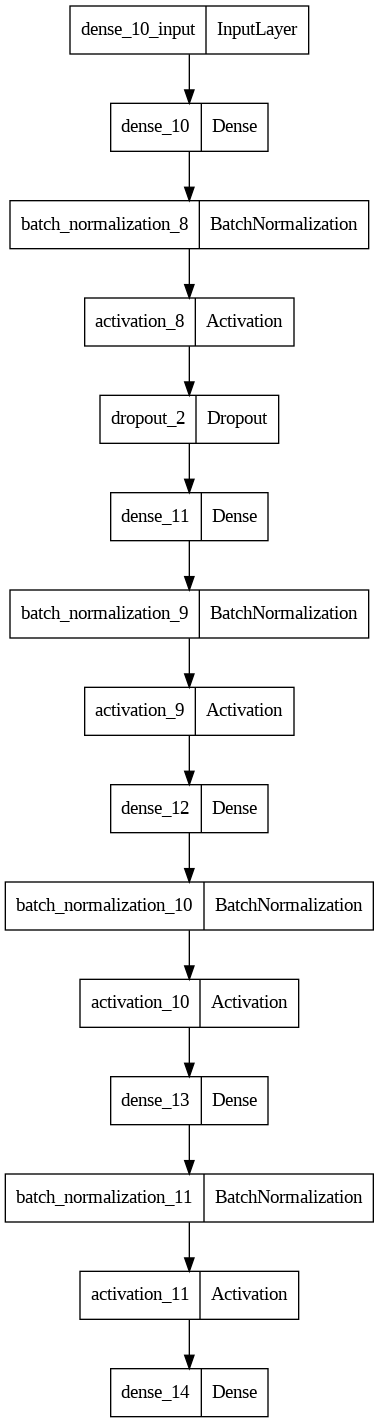

In [ ]:
activation = 'elu'

keras_model = keras.Sequential([
    layers.Dense(units=32, input_shape=(X.shape[1:])),
    layers.BatchNormalization(),
    layers.Activation(activation),
    layers.Dropout(0.2),

    layers.Dense(units=40),
    layers.BatchNormalization(),
    layers.Activation(activation),

    layers.Dense(units=20),
    layers.BatchNormalization(),
    layers.Activation(activation),

    layers.Dense(units=8),
    layers.BatchNormalization(),
    layers.Activation(activation),

    layers.Dense(units=1, activation='sigmoid')
])

fig = plot_model(keras_model)

es = cb.EarlyStopping(monitor='loss', patience=5, mode='min')
lr = cb.ReduceLROnPlateau(monitor='val_loss', patience=3, mindelta=1e-1)

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.01)

keras_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
fig

In [ ]:
history = keras_model.fit(X_train, y_train, epochs=50, batch_size=512, callbacks=[es, lr])

Epoch 1/50
35/38 [==========================>...] - ETA: 0s - loss: 0.6358 - accuracy: 0.6491

38/38 [==============================] - 2s 5ms/step - loss: 0.6335 - accuracy: 0.6510 - lr: 0.0100
Epoch 2/50
36/38 [===========================>..] - ETA: 0s - loss: 0.6030 - accuracy: 0.6710

38/38 [==============================] - 0s 5ms/step - loss: 0.6033 - accuracy: 0.6709 - lr: 0.0100
Epoch 3/50
35/38 [==========================>...] - ETA: 0s - loss: 0.6013 - accuracy: 0.6738

38/38 [==============================] - 0s 5ms/step - loss: 0.6007 - accuracy: 0.6743 - lr: 0.0100
Epoch 4/50
33/38 [=========================>....] - ETA: 0s - loss: 0.5986 - accuracy: 0.6729

38/38 [==============================] - 0s 5ms/step - loss: 0.5986 - accuracy: 0.6739 - lr: 0.0100
Epoch 5/50
36/38 [===========================>..] - ETA: 0s - loss: 0.5987 - accuracy: 0.6761

38/38 [==============================] - 0s 5ms/step - loss: 0.5987 - accuracy: 0.6764 - lr: 0.0100
Epoch 6/50
32/38 [========================>.....] - ETA: 0s - loss: 0.5977 - accuracy: 0.6754

38/38 [==============================] - 0s 5ms/step - loss: 0.5985 - accuracy: 0.6739 - lr: 0.0100
Epoch 7/50
35/38 [==========================>...] - ETA: 0s - loss: 0.5970 - accuracy: 0.6742

38/38 [==============================] - 0s 5ms/step - loss: 0.5966 - accuracy: 0.6755 - lr: 0.0100
Epoch 8/50
34/38 [=========================>....] - ETA: 0s - loss: 0.5985 - accuracy: 0.6726

38/38 [==============================] - 0s 5ms/step - loss: 0.5962 - accuracy: 0.6745 - lr: 0.0100
Epoch 9/50
32/38 [========================>.....] - ETA: 0s - loss: 0.5968 - accuracy: 0.6723

38/38 [==============================] - 0s 5ms/step - loss: 0.5954 - accuracy: 0.6757 - lr: 0.0100
Epoch 10/50
35/38 [==========================>...] - ETA: 0s - loss: 0.5949 - accuracy: 0.6771

38/38 [==============================] - 0s 6ms/step - loss: 0.5951 - accuracy: 0.6775 - lr: 0.0100
Epoch 11/50
35/38 [==========================>...] - ETA: 0s - loss: 0.5989 - accuracy: 0.6708

38/38 [==============================] - 0s 6ms/step - loss: 0.5988 - accuracy: 0.6715 - lr: 0.0100
Epoch 12/50
31/38 [=======================>......] - ETA: 0s - loss: 0.5955 - accuracy: 0.6774

38/38 [==============================] - 0s 5ms/step - loss: 0.5953 - accuracy: 0.6772 - lr: 0.0100
Epoch 13/50
33/38 [=========================>....] - ETA: 0s - loss: 0.5952 - accuracy: 0.6759

38/38 [==============================] - 0s 5ms/step - loss: 0.5954 - accuracy: 0.6763 - lr: 0.0100
Epoch 14/50
38/38 [==============================] - ETA: 0s - loss: 0.5954 - accuracy: 0.6761

38/38 [==============================] - 0s 6ms/step - loss: 0.5954 - accuracy: 0.6761 - lr: 0.0100
Epoch 15/50
37/38 [============================>.] - ETA: 0s - loss: 0.5943 - accuracy: 0.6742

38/38 [==============================] - 0s 6ms/step - loss: 0.5944 - accuracy: 0.6740 - lr: 0.0100
Epoch 16/50
37/38 [============================>.] - ETA: 0s - loss: 0.5950 - accuracy: 0.6761

38/38 [==============================] - 0s 6ms/step - loss: 0.5947 - accuracy: 0.6764 - lr: 0.0100
Epoch 17/50
37/38 [============================>.] - ETA: 0s - loss: 0.5944 - accuracy: 0.6753

38/38 [==============================] - 0s 6ms/step - loss: 0.5945 - accuracy: 0.6751 - lr: 0.0100
Epoch 18/50
33/38 [=========================>....] - ETA: 0s - loss: 0.5959 - accuracy: 0.6755

38/38 [==============================] - 0s 5ms/step - loss: 0.5953 - accuracy: 0.6762 - lr: 0.0100
Epoch 19/50
37/38 [============================>.] - ETA: 0s - loss: 0.5950 - accuracy: 0.6736

38/38 [==============================] - 0s 6ms/step - loss: 0.5949 - accuracy: 0.6734 - lr: 0.0100
Epoch 20/50
37/38 [============================>.] - ETA: 0s - loss: 0.5952 - accuracy: 0.6736

38/38 [==============================] - 0s 6ms/step - loss: 0.5944 - accuracy: 0.6746 - lr: 0.0100
Epoch 21/50
30/38 [======================>.......] - ETA: 0s - loss: 0.5926 - accuracy: 0.6761

38/38 [==============================] - 0s 5ms/step - loss: 0.5938 - accuracy: 0.6750 - lr: 0.0100
Epoch 22/50
31/38 [=======================>......] - ETA: 0s - loss: 0.5968 - accuracy: 0.6756

38/38 [==============================] - 0s 5ms/step - loss: 0.5944 - accuracy: 0.6764 - lr: 0.0100
Epoch 23/50
31/38 [=======================>......] - ETA: 0s - loss: 0.5953 - accuracy: 0.6762

38/38 [==============================] - 0s 6ms/step - loss: 0.5940 - accuracy: 0.6775 - lr: 0.0100
Epoch 24/50
29/38 [=====================>........] - ETA: 0s - loss: 0.5934 - accuracy: 0.6771

38/38 [==============================] - 0s 6ms/step - loss: 0.5927 - accuracy: 0.6765 - lr: 0.0100
Epoch 25/50
36/38 [===========================>..] - ETA: 0s - loss: 0.5929 - accuracy: 0.6760

38/38 [==============================] - 0s 6ms/step - loss: 0.5928 - accuracy: 0.6765 - lr: 0.0100
Epoch 26/50
31/38 [=======================>......] - ETA: 0s - loss: 0.5941 - accuracy: 0.6721

38/38 [==============================] - 0s 5ms/step - loss: 0.5930 - accuracy: 0.6750 - lr: 0.0100
Epoch 27/50
34/38 [=========================>....] - ETA: 0s - loss: 0.5929 - accuracy: 0.6759

38/38 [==============================] - 0s 5ms/step - loss: 0.5928 - accuracy: 0.6758 - lr: 0.0100
Epoch 28/50
31/38 [=======================>......] - ETA: 0s - loss: 0.5917 - accuracy: 0.6770

38/38 [==============================] - 0s 5ms/step - loss: 0.5930 - accuracy: 0.6763 - lr: 0.0100
Epoch 29/50
30/38 [======================>.......] - ETA: 0s - loss: 0.5915 - accuracy: 0.6808

38/38 [==============================] - 0s 5ms/step - loss: 0.5925 - accuracy: 0.6794 - lr: 0.0100
Epoch 30/50
35/38 [==========================>...] - ETA: 0s - loss: 0.5941 - accuracy: 0.6775

38/38 [==============================] - 0s 5ms/step - loss: 0.5934 - accuracy: 0.6779 - lr: 0.0100
Epoch 31/50
33/38 [=========================>....] - ETA: 0s - loss: 0.5916 - accuracy: 0.6787

38/38 [==============================] - 0s 5ms/step - loss: 0.5922 - accuracy: 0.6776 - lr: 0.0100
Epoch 32/50
33/38 [=========================>....] - ETA: 0s - loss: 0.5940 - accuracy: 0.6770

38/38 [==============================] - 0s 5ms/step - loss: 0.5944 - accuracy: 0.6765 - lr: 0.0100
Epoch 33/50
30/38 [======================>.......] - ETA: 0s - loss: 0.5943 - accuracy: 0.6753

38/38 [==============================] - 0s 6ms/step - loss: 0.5923 - accuracy: 0.6779 - lr: 0.0100
Epoch 34/50
33/38 [=========================>....] - ETA: 0s - loss: 0.5913 - accuracy: 0.6766

38/38 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.6760 - lr: 0.0100
Epoch 35/50
37/38 [============================>.] - ETA: 0s - loss: 0.5933 - accuracy: 0.6765

38/38 [==============================] - 0s 8ms/step - loss: 0.5930 - accuracy: 0.6767 - lr: 0.0100
Epoch 36/50
31/38 [=======================>......] - ETA: 0s - loss: 0.5908 - accuracy: 0.6808

38/38 [==============================] - 0s 7ms/step - loss: 0.5918 - accuracy: 0.6794 - lr: 0.0100
Epoch 37/50
32/38 [========================>.....] - ETA: 0s - loss: 0.5933 - accuracy: 0.6766

38/38 [==============================] - 0s 7ms/step - loss: 0.5929 - accuracy: 0.6763 - lr: 0.0100
Epoch 38/50
37/38 [============================>.] - ETA: 0s - loss: 0.5922 - accuracy: 0.6778

38/38 [==============================] - 0s 8ms/step - loss: 0.5923 - accuracy: 0.6779 - lr: 0.0100
Epoch 39/50
37/38 [============================>.] - ETA: 0s - loss: 0.5927 - accuracy: 0.6791

38/38 [==============================] - 0s 8ms/step - loss: 0.5925 - accuracy: 0.6795 - lr: 0.0100
Epoch 40/50
36/38 [===========================>..] - ETA: 0s - loss: 0.5917 - accuracy: 0.6791

38/38 [==============================] - 0s 8ms/step - loss: 0.5913 - accuracy: 0.6791 - lr: 0.0100
Epoch 41/50
38/38 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.6772

38/38 [==============================] - 0s 7ms/step - loss: 0.5927 - accuracy: 0.6772 - lr: 0.0100
Epoch 42/50
35/38 [==========================>...] - ETA: 0s - loss: 0.5923 - accuracy: 0.6767

38/38 [==============================] - 0s 8ms/step - loss: 0.5917 - accuracy: 0.6773 - lr: 0.0100
Epoch 43/50
38/38 [==============================] - ETA: 0s - loss: 0.5913 - accuracy: 0.6760

38/38 [==============================] - 0s 7ms/step - loss: 0.5913 - accuracy: 0.6760 - lr: 0.0100
Epoch 44/50
32/38 [========================>.....] - ETA: 0s - loss: 0.5911 - accuracy: 0.6783

38/38 [==============================] - 0s 7ms/step - loss: 0.5922 - accuracy: 0.6768 - lr: 0.0100
Epoch 45/50
37/38 [============================>.] - ETA: 0s - loss: 0.5922 - accuracy: 0.6797

38/38 [==============================] - 0s 8ms/step - loss: 0.5919 - accuracy: 0.6802 - lr: 0.0100
Epoch 46/50
29/38 [=====================>........] - ETA: 0s - loss: 0.5898 - accuracy: 0.6814

38/38 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.6790 - lr: 0.0100
Epoch 47/50
33/38 [=========================>....] - ETA: 0s - loss: 0.5935 - accuracy: 0.6776

38/38 [==============================] - 0s 5ms/step - loss: 0.5921 - accuracy: 0.6796 - lr: 0.0100
Epoch 48/50
31/38 [=======================>......] - ETA: 0s - loss: 0.5909 - accuracy: 0.6799

38/38 [==============================] - 0s 5ms/step - loss: 0.5903 - accuracy: 0.6809 - lr: 0.0100
Epoch 49/50
35/38 [==========================>...] - ETA: 0s - loss: 0.5914 - accuracy: 0.6776

38/38 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.6771 - lr: 0.0100
Epoch 50/50
36/38 [===========================>..] - ETA: 0s - loss: 0.5900 - accuracy: 0.6797

38/38 [==============================] - 0s 5ms/step - loss: 0.5894 - accuracy: 0.6800 - lr: 0.0100


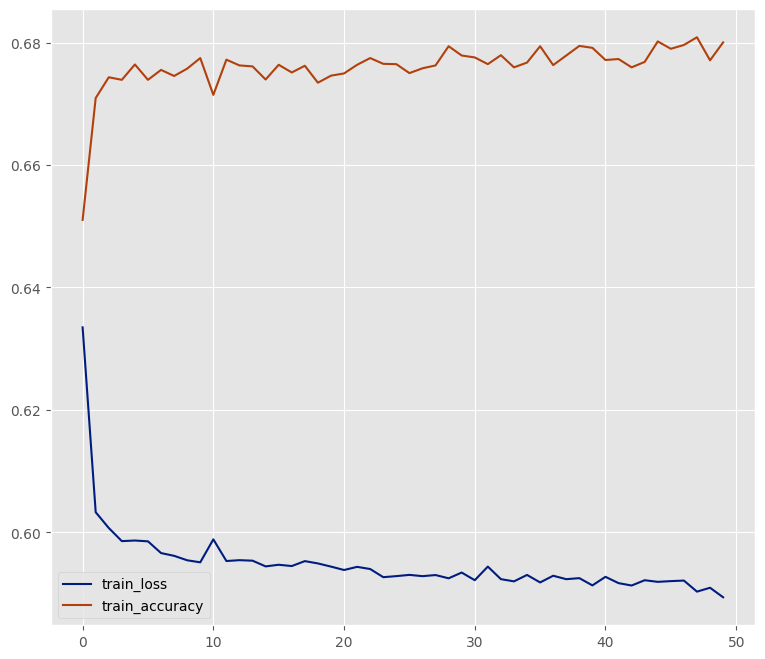

In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 2)
plt.plot(range(len(train_loss)), train_loss, label='train_loss')
plt.plot(range(len(train_accuracy)), train_accuracy, label='train_accuracy')
plt.legend();

150/150 [==============================] - 0s 2ms/step
Accuracy score: 67.25182863113898


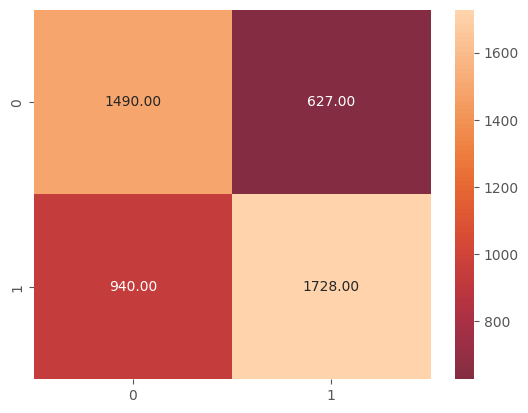

              precision    recall  f1-score   support

       False       0.61      0.70      0.66      2117
        True       0.73      0.65      0.69      2668

    accuracy                           0.67      4785
   macro avg       0.67      0.68      0.67      4785
weighted avg       0.68      0.67      0.67      4785

AUC: 67.57511655131339


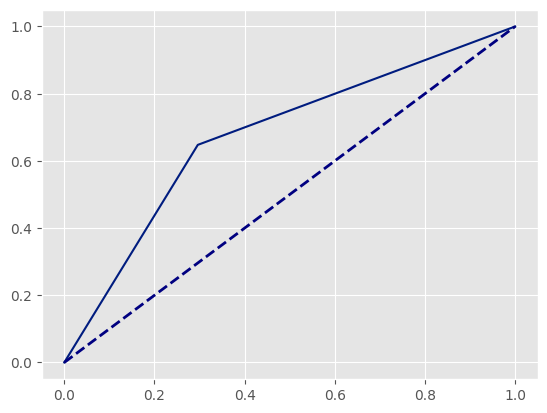

In [ ]:
y_pred = keras_model.predict(X_test)>0.5
evaluate(y_pred, y_test)

# **Random Forest**

Accuracy score: 67.1055381400209


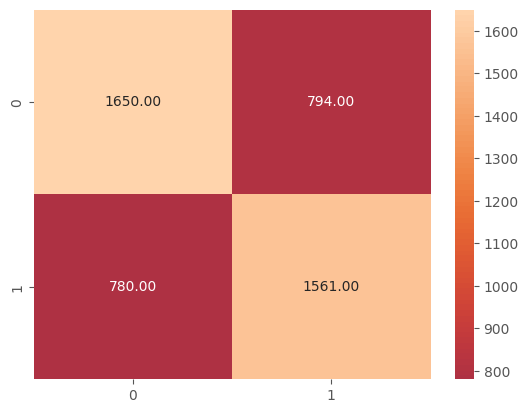

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2444
           1       0.66      0.67      0.66      2341

    accuracy                           0.67      4785
   macro avg       0.67      0.67      0.67      4785
weighted avg       0.67      0.67      0.67      4785

AUC: 67.09659027749133


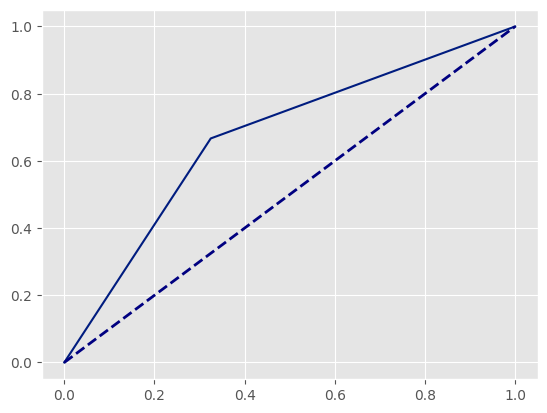

In [ ]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)
evaluate(y_pred, y_test)

# **XGboost**

Accuracy score: 66.54127481713688


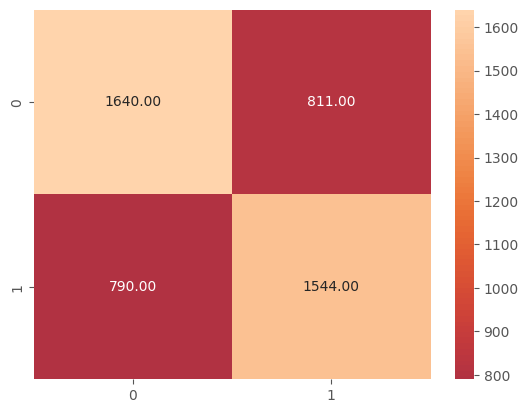

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2451
           1       0.66      0.66      0.66      2334

    accuracy                           0.67      4785
   macro avg       0.67      0.67      0.67      4785
weighted avg       0.67      0.67      0.67      4785

AUC: 66.53199627873414


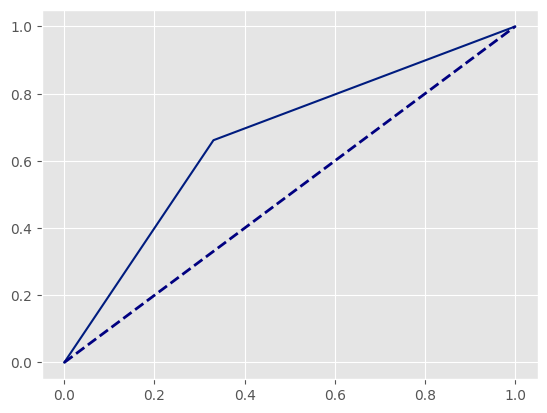

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
evaluate(y_pred, y_test)

# **Decision Tree**

Accuracy score: 60.71055381400209


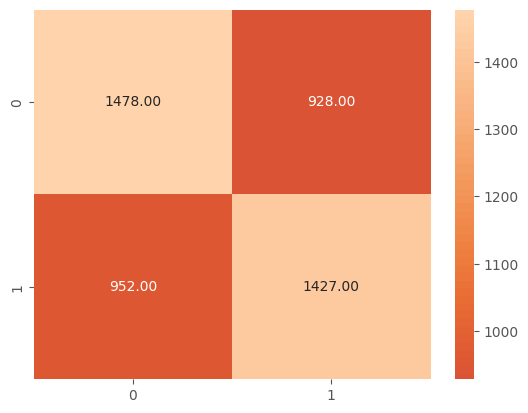

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      2406
           1       0.61      0.60      0.60      2379

    accuracy                           0.61      4785
   macro avg       0.61      0.61      0.61      4785
weighted avg       0.61      0.61      0.61      4785

AUC: 60.70647257434387


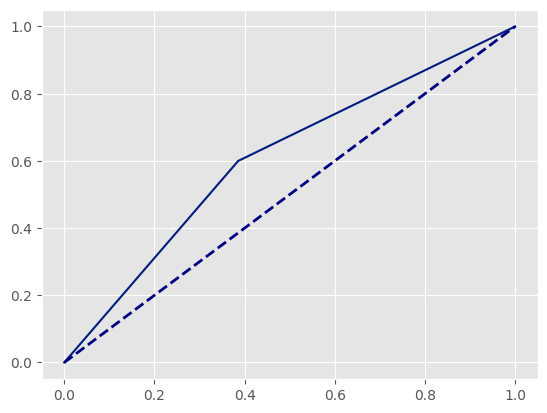

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
evaluate(y_pred, y_test)

# **Support Vector Machine**

Accuracy score: 67.31452455590386


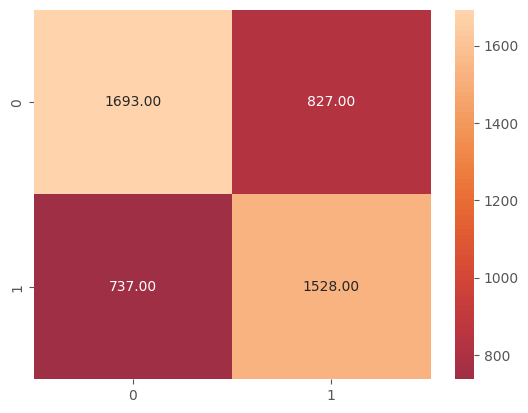

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      2520
           1       0.65      0.67      0.66      2265

    accuracy                           0.67      4785
   macro avg       0.67      0.67      0.67      4785
weighted avg       0.67      0.67      0.67      4785

AUC: 67.32195416798066


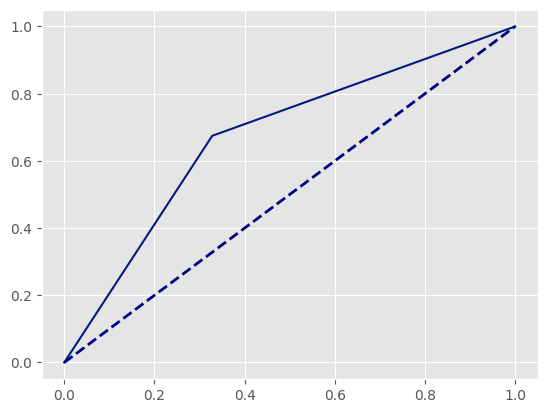

In [ ]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
evaluate(y_pred, y_test)

# **Neural Networks**

Accuracy score: 65.68443051201672


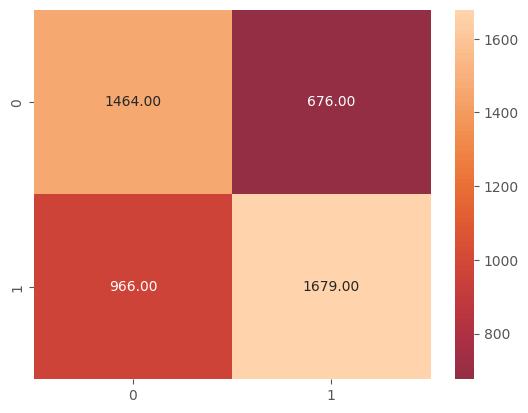

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      2140
           1       0.71      0.63      0.67      2645

    accuracy                           0.66      4785
   macro avg       0.66      0.66      0.66      4785
weighted avg       0.66      0.66      0.66      4785

AUC: 65.94473791141812


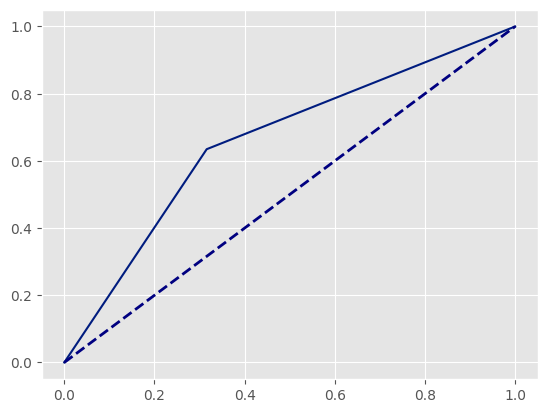

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
evaluate(y_pred, y_test)

# **Logistic Regression**

Accuracy score: 67.7115987460815


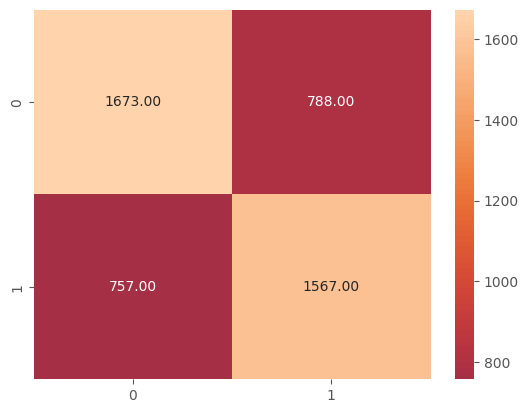

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2461
           1       0.67      0.67      0.67      2324

    accuracy                           0.68      4785
   macro avg       0.68      0.68      0.68      4785
weighted avg       0.68      0.68      0.68      4785

AUC: 67.70367299580863


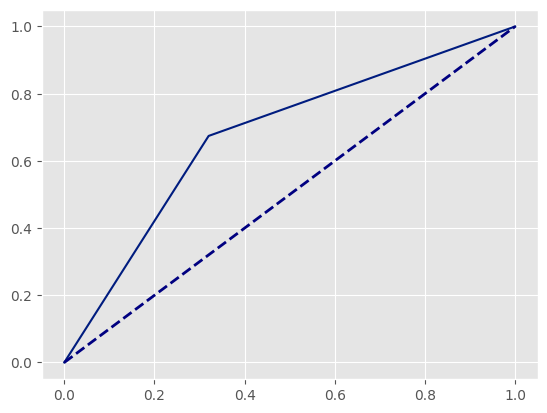

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

evaluate(y_pred, y_test)

# **KNN**

Accuracy score: 63.2183908045977


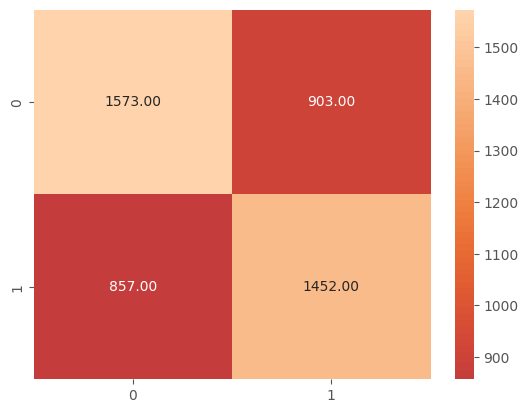

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      2476
           1       0.62      0.63      0.62      2309

    accuracy                           0.63      4785
   macro avg       0.63      0.63      0.63      4785
weighted avg       0.63      0.63      0.63      4785

AUC: 63.20712622028992


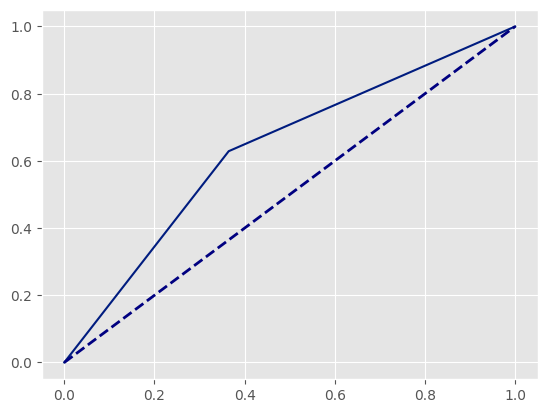

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)
evaluate(y_pred, y_test)

# **Naive Bayes**

Accuracy score: 66.16509926854755


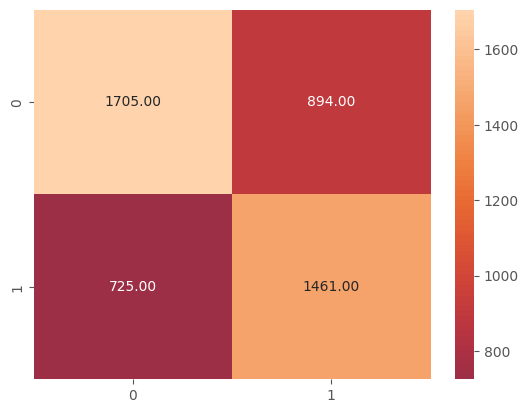

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      2599
           1       0.62      0.67      0.64      2186

    accuracy                           0.66      4785
   macro avg       0.66      0.66      0.66      4785
weighted avg       0.66      0.66      0.66      4785

AUC: 66.2182777034027


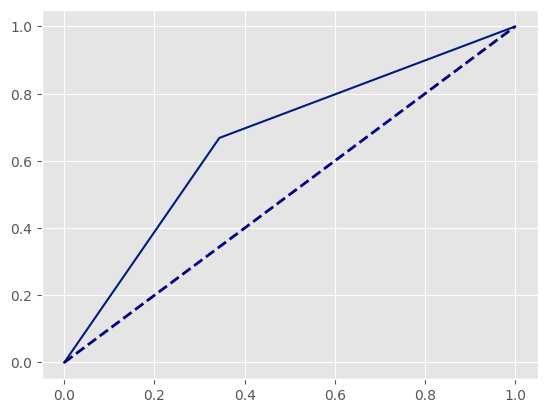

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

evaluate(y_pred, y_test)

In [ ]:
def get_team_data(team: str) -> list:
    # team total fifa points
    home_FP = df.loc[(df['home_team']==team).values & (df['year'] >= 2021).values & (df['away_team'].isin(teams_worldcup)).values, 'home_team_total_fifa_points'].mean()
    away_FP = df.loc[(df['away_team']==team).values & (df['year'] >= 2021).values & (df['home_team'].isin(teams_worldcup)).values, 'away_team_total_fifa_points'].mean()
    fifa_points = np.mean([home_FP, away_FP])
    if np.isnan(fifa_points):
        home_FP = df.loc[(df['home_team']==team).values & (df['away_team'].isin(teams_worldcup)).values, 'home_team_total_fifa_points'].iloc[:2].mean()
        away_FP = df.loc[(df['away_team']==team).values & (df['home_team'].isin(teams_worldcup)).values, 'away_team_total_fifa_points'].iloc[:3].mean()
        fifa_points = np.mean([home_FP, away_FP])


    # team fifa rank
    home_FR = df.loc[(df['home_team']==team).values & (df['year'] >= 2021).values & (df['away_team'].isin(teams_worldcup)).values, 'home_team_fifa_rank'].mean()
    away_FR = df.loc[(df['away_team']==team).values & (df['year'] >= 2021).values & (df['home_team'].isin(teams_worldcup)).values, 'away_team_fifa_rank'].mean()
    fifa_rank = np.mean([home_FR, away_FR])
    if np.isnan(fifa_rank):
        home_FR = df.loc[(df['home_team']==team).values & (df['away_team'].isin(teams_worldcup)).values, 'home_team_fifa_rank'].iloc[:2].mean()
        away_FR = df.loc[(df['away_team']==team).values & (df['home_team'].isin(teams_worldcup)).values, 'away_team_fifa_rank'].iloc[:3].mean()
        fifa_rank= np.mean([home_FR, away_FR])


    # team continent
    continent = df.loc[df['home_team']==team, 'home_team_continent_encoded'].mode()[0]

    # scores
    home_scores = df.loc[(df['home_team']==team).values & (df['away_team'].isin(teams_worldcup)).values].sort_values(by='date').drop('home_team_score', axis=1).filter(regex='score').filter(regex='home').iloc[:5].mean()
    away_scores = df.loc[(df['away_team']==team).values & (df['home_team'].isin(teams_worldcup)).values].sort_values(by='date').drop('away_team_score', axis=1).filter(regex='score').filter(regex='away').iloc[:5].mean()
    scores = (home_scores.values + away_scores.values) / 2


    return [fifa_rank, fifa_points, continent] +  [*scores]

def prepare_data(team1_data: list, team2_data: list, tournament_rank:str, shoot_out:bool) -> np.ndarray:
    fifa_pts_diff = team1_data[1] - team2_data[1]
    fifa_pts_sum = team1_data[1] + team2_data[1]
    fifa_rank_diff = team1_data[0] - team2_data[0]
    fifa_rank_sum = team1_data[0] + team2_data[0]
    tournaments = [*tournament_rank_encoder.transform(np.array(tournament_rank).reshape(-1, 1)).toarray()[0]]
    X = np.array([team1_data[0], team2_data[0], team1_data[1], team2_data[1], shoot_out, team1_data[3], team2_data[3], *team1_data[4:], *team2_data[4:],
                 fifa_pts_diff, fifa_pts_sum, fifa_rank_diff, fifa_rank_sum, *tournaments, team1_data[2], team2_data[2]])
    return X.reshape(-1, 26)

**Selected Model ( Logistic Regression) Evaluation**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),  # Feature scaling
    ('logreg', LogisticRegression())  # Logistic regression model
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameters to tune
hyperparameters = {
    'logreg__C': [0.1, 1.0, 10.0],  # Regularization parameter
    'logreg__solver': ['liblinear', 'lbfgs'],  # Solver algorithm
    'logreg__max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the testing set
y_pred = best_model.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      2430
           1       0.67      0.66      0.66      2355

    accuracy                           0.67      4785
   macro avg       0.67      0.67      0.67      4785
weighted avg       0.67      0.67      0.67      4785

Best Hyperparameters: {'logreg__C': 1.0, 'logreg__max_iter': 100, 'logreg__solver': 'liblinear'}


In [ ]:
from sklearn.metrics import r2_score



# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)


R2 Score: -0.3052318418914315


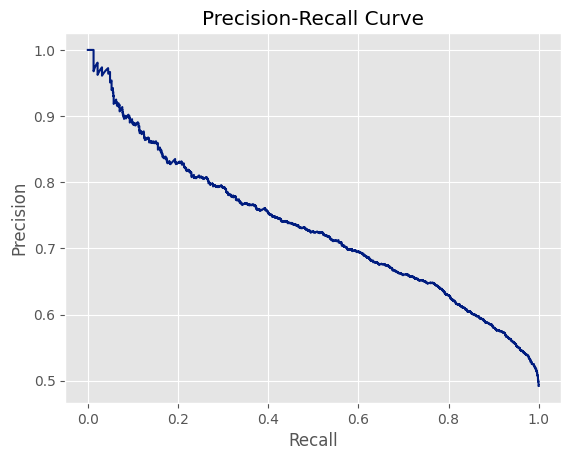

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = lr.predict_proba(X_test)[:, 1]

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# **Group Stage (XGBC)**

In [ ]:
def predict_match(team1, team2, shoot_out=0):
    team1 = get_team_data(team1)
    team2 = get_team_data(team2)
    inp1 = prepare_data(team1, team2, 'International', shoot_out=shoot_out)
    y_pred1 = xgbc.predict(inp1)

    inp2 = prepare_data(team2, team1, 'International', shoot_out=shoot_out)
    y_pred2 = xgbc.predict(inp2)

    y_pred = (1 + y_pred1 - y_pred2) / 2
    return y_pred

def calc_points(team1, team2):
    y_pred = predict_match(team1, team2)
    if (y_pred>=0.55):
        return 3, 0
    elif (y_pred<=0.45):
        return 0, 3
    else :
        return 1, 1

groups = np.array(teams_worldcup).reshape(8, 4)
groups_pts = []
for i, group in enumerate(groups):
    print(f'Group {i+1}: ', end=f"\n{20*'-'}\n")
    groups_pts.append(dict(zip(group, np.zeros(4))))
    matches = [*combinations(group, 2)]

    # play matches
    for team1, team2 in matches:
        pt1, pt2 = calc_points(team1, team2)
        print(f"{team1} : {pt1} VS {team2} : {pt2}")
        groups_pts[i][team1] += pt1
        groups_pts[i][team2] += pt2
    print(30*'=')

Group 1: 
--------------------
Qatar : 1 VS Ecuador : 1
Qatar : 3 VS Senegal : 0
Qatar : 0 VS Netherlands : 3
Ecuador : 3 VS Senegal : 0
Ecuador : 0 VS Netherlands : 3
Senegal : 0 VS Netherlands : 3
Group 2: 
--------------------
England : 3 VS IR Iran : 0
England : 3 VS USA : 0
England : 3 VS Wales : 0
IR Iran : 0 VS USA : 3
IR Iran : 0 VS Wales : 3
USA : 3 VS Wales : 0
Group 3: 
--------------------
Argentina : 3 VS Saudi Arabia : 0
Argentina : 1 VS Mexico : 1
Argentina : 3 VS Poland : 0
Saudi Arabia : 0 VS Mexico : 3
Saudi Arabia : 0 VS Poland : 3
Mexico : 3 VS Poland : 0
Group 4: 
--------------------
France : 1 VS Australia : 1
France : 1 VS Denmark : 1
France : 3 VS Tunisia : 0
Australia : 0 VS Denmark : 3
Australia : 3 VS Tunisia : 0
Denmark : 1 VS Tunisia : 1
Group 5: 
--------------------
Spain : 3 VS Costa Rica : 0
Spain : 1 VS Germany : 1
Spain : 3 VS Japan : 0
Costa Rica : 0 VS Germany : 3
Costa Rica : 1 VS Japan : 1
Germany : 3 VS Japan : 0
Group 6: 
--------------------
B

# **Groups After Group Stage**

In [ ]:
sorted_groups_pts = []
def draw_break(groups_pts):
    for i, group_pts in enumerate(groups_pts):
        group = dict(reversed(sorted(group_pts.items(), key=lambda item: item[1])))
        teams = [*group.keys()]
        points = [*group.values()]

        if points[0] <= points[1]:
            out = predict_match(teams[0], teams[1])
            if out < 0.5:
                temp = teams[0]
                teams[0] = teams[1]
                teams[1] = temp

        if points[1] <= points[2]:
            out = predict_match(teams[1], teams[2])
            if out < 0.5:
                temp = teams[1]
                teams[1] = teams[2]
                teams[2] = temp

        sorted_groups_pts.append(dict(zip(teams, points)))
    return sorted_groups_pts

sorted_groups_pts = draw_break(groups_pts)

sorted_teams = []
print(colored("Groups after group stage: \n", 'red'))
for group in sorted_groups_pts:
    print(group, end=f'\n{50*"-"}\n')
    teams = [*group.keys()]
    sorted_teams.append(teams[:2])

# the round of 16
to_16 = []
for i in range(0, 8, 2):
    to_16.append((sorted_teams[i][0], sorted_teams[i+1][1]))
    to_16.append((sorted_teams[i+1][0], sorted_teams[i][1]))


to_8 = []
print(colored(f'\n{50*"="}\nMatches results in the round of 16:\n{50*"-"}', 'red'))
for i, (team1, team2) in enumerate(to_16):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_8.append(winner)

Groups after group stage: 

{'Netherlands': 9.0, 'Ecuador': 4.0, 'Qatar': 4.0, 'Senegal': 0.0}
--------------------------------------------------
{'England': 9.0, 'USA': 6.0, 'Wales': 3.0, 'IR Iran': 0.0}
--------------------------------------------------
{'Mexico': 7.0, 'Argentina': 7.0, 'Poland': 3.0, 'Saudi Arabia': 0.0}
--------------------------------------------------
{'Denmark': 5.0, 'France': 5.0, 'Australia': 4.0, 'Tunisia': 1.0}
--------------------------------------------------
{'Germany': 7.0, 'Spain': 7.0, 'Japan': 1.0, 'Costa Rica': 1.0}
--------------------------------------------------
{'Belgium': 7.0, 'Croatia': 6.0, 'Canada': 2.0, 'Morocco': 1.0}
--------------------------------------------------
{'Brazil': 9.0, 'Switzerland': 6.0, 'Cameroon': 3.0, 'Serbia': 0.0}
--------------------------------------------------
{'Portugal': 7.0, 'Uruguay': 6.0, 'Ghana': 4.0, 'Korea Republic': 0.0}
--------------------------------------------------

Matches results in the round of 16

In [ ]:
# the round of 8
# to_8 = to_8[::2] + to_8[1::2]
to_8 = np.array(to_8[::2] + to_8[1::2]).reshape(-1, 2)
to_4 = []
for i, (team1, team2) in enumerate(to_8):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_4.append(winner)

Match1: USA VS France
Winner: France
Match2: Croatia VS Brazil
Winner: Brazil
Match3: Ecuador VS Argentina
Winner: Argentina
Match4: Belgium VS Portugal
Winner: Belgium


In [ ]:
#Semi Final
to_4 = np.array(to_4).reshape(-1, 2)
to_final = []
to_third_place_playoff = []
for i, (team1, team2) in enumerate(to_4):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    loser = team1 if out <= 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_final.append(winner)
    to_third_place_playoff.append(loser)

Match1: France VS Brazil
Winner: Brazil
Match2: Argentina VS Belgium
Winner: Belgium


In [ ]:
# third place play-off
third_out = predict_match(*to_third_place_playoff, shoot_out=1)
third = to_third_place_playoff[1 - int(third_out>0.5)]
fourth = to_third_place_playoff[int(third_out>0.5)]

# Final
final_out = predict_match(*to_final, shoot_out=1)
Winner = to_final[1 - int(final_out>0.5)]
second = to_final[int(final_out>0.5)]

print(f"Winner of the World Cup Qatar 2022: {colored(Winner, 'yellow')}")
print(f"Second place of the World Cup Qatar 2022: {colored(second, 'red')}")
print(f"Third place of the World Cup Qatar 2022: {colored(third, 'blue')}")
print(f"Fourth place of the World Cup Qatar 2022:", end=' ')
cprint(fourth, 'blue', 'on_grey')

Winner of the World Cup Qatar 2022: Belgium
Second place of the World Cup Qatar 2022: Brazil
Third place of the World Cup Qatar 2022: France
Fourth place of the World Cup Qatar 2022: Argentina


# **Group Stage(Random Forest)**

In [ ]:
def predict_match(team1, team2, shoot_out=0):
    team1 = get_team_data(team1)
    team2 = get_team_data(team2)
    inp1 = prepare_data(team1, team2, 'International', shoot_out=shoot_out)
    y_pred1 = RFmodel.predict(inp1)

    inp2 = prepare_data(team2, team1, 'International', shoot_out=shoot_out)
    y_pred2 = RFmodel.predict(inp2)

    y_pred = (1 + y_pred1 - y_pred2) / 2
    return y_pred

def calc_points(team1, team2):
    y_pred = predict_match(team1, team2)
    if (y_pred>=0.55):
        return 3, 0
    elif (y_pred<=0.45):
        return 0, 3
    else :
        return 1, 1

groups = np.array(teams_worldcup).reshape(8, 4)
groups_pts = []
for i, group in enumerate(groups):
    print(f'Group {i+1}: ', end=f"\n{20*'-'}\n")
    groups_pts.append(dict(zip(group, np.zeros(4))))
    matches = [*combinations(group, 2)]

    # play matches
    for team1, team2 in matches:
        pt1, pt2 = calc_points(team1, team2)
        print(f"{team1} : {pt1} VS {team2} : {pt2}")
        groups_pts[i][team1] += pt1
        groups_pts[i][team2] += pt2
    print(30*'=')

Group 1: 
--------------------
Qatar : 1 VS Ecuador : 1
Qatar : 1 VS Senegal : 1
Qatar : 0 VS Netherlands : 3
Ecuador : 3 VS Senegal : 0
Ecuador : 0 VS Netherlands : 3
Senegal : 0 VS Netherlands : 3
Group 2: 
--------------------
England : 3 VS IR Iran : 0
England : 3 VS USA : 0
England : 3 VS Wales : 0
IR Iran : 0 VS USA : 3
IR Iran : 0 VS Wales : 3
USA : 1 VS Wales : 1
Group 3: 
--------------------
Argentina : 3 VS Saudi Arabia : 0
Argentina : 1 VS Mexico : 1
Argentina : 3 VS Poland : 0
Saudi Arabia : 0 VS Mexico : 3
Saudi Arabia : 0 VS Poland : 3
Mexico : 3 VS Poland : 0
Group 4: 
--------------------
France : 3 VS Australia : 0
France : 1 VS Denmark : 1
France : 3 VS Tunisia : 0
Australia : 0 VS Denmark : 3
Australia : 1 VS Tunisia : 1
Denmark : 3 VS Tunisia : 0
Group 5: 
--------------------
Spain : 3 VS Costa Rica : 0
Spain : 3 VS Germany : 0
Spain : 3 VS Japan : 0
Costa Rica : 0 VS Germany : 3
Costa Rica : 0 VS Japan : 3
Germany : 3 VS Japan : 0
Group 6: 
--------------------
B

# **Groups After Group Stage**

In [ ]:
sorted_groups_pts = []
def draw_break(groups_pts):
    for i, group_pts in enumerate(groups_pts):
        group = dict(reversed(sorted(group_pts.items(), key=lambda item: item[1])))
        teams = [*group.keys()]
        points = [*group.values()]

        if points[0] <= points[1]:
            out = predict_match(teams[0], teams[1])
            if out < 0.5:
                temp = teams[0]
                teams[0] = teams[1]
                teams[1] = temp

        if points[1] <= points[2]:
            out = predict_match(teams[1], teams[2])
            if out < 0.5:
                temp = teams[1]
                teams[1] = teams[2]
                teams[2] = temp

        sorted_groups_pts.append(dict(zip(teams, points)))
    return sorted_groups_pts

sorted_groups_pts = draw_break(groups_pts)

sorted_teams = []
print(colored("Groups after group stage: \n", 'red'))
for group in sorted_groups_pts:
    print(group, end=f'\n{50*"-"}\n')
    teams = [*group.keys()]
    sorted_teams.append(teams[:2])

# the round of 16
to_16 = []
for i in range(0, 8, 2):
    to_16.append((sorted_teams[i][0], sorted_teams[i+1][1]))
    to_16.append((sorted_teams[i+1][0], sorted_teams[i][1]))


to_8 = []
print(colored(f'\n{50*"="}\nMatches results in the round of 16:\n{50*"-"}', 'red'))
for i, (team1, team2) in enumerate(to_16):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_8.append(winner)

Groups after group stage: 

{'Netherlands': 9.0, 'Ecuador': 4.0, 'Qatar': 2.0, 'Senegal': 1.0}
--------------------------------------------------
{'England': 9.0, 'Wales': 4.0, 'USA': 4.0, 'IR Iran': 0.0}
--------------------------------------------------
{'Mexico': 7.0, 'Argentina': 7.0, 'Poland': 3.0, 'Saudi Arabia': 0.0}
--------------------------------------------------
{'Denmark': 7.0, 'France': 7.0, 'Tunisia': 1.0, 'Australia': 1.0}
--------------------------------------------------
{'Spain': 9.0, 'Germany': 6.0, 'Japan': 3.0, 'Costa Rica': 0.0}
--------------------------------------------------
{'Belgium': 9.0, 'Croatia': 6.0, 'Morocco': 3.0, 'Canada': 0.0}
--------------------------------------------------
{'Brazil': 9.0, 'Switzerland': 6.0, 'Cameroon': 1.0, 'Serbia': 1.0}
--------------------------------------------------
{'Portugal': 9.0, 'Uruguay': 6.0, 'Korea Republic': 3.0, 'Ghana': 0.0}
--------------------------------------------------

Matches results in the round of 16

In [ ]:
# the round of 8
# to_8 = to_8[::2] + to_8[1::2]
to_8 = np.array(to_8[::2] + to_8[1::2]).reshape(-1, 2)
to_4 = []
for i, (team1, team2) in enumerate(to_8):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_4.append(winner)

Match1: Netherlands VS France
Winner: France
Match2: Spain VS Brazil
Winner: Brazil
Match3: England VS Argentina
Winner: Argentina
Match4: Belgium VS Portugal
Winner: Belgium


In [ ]:
#Semi Final
to_4 = np.array(to_4).reshape(-1, 2)
to_final = []
to_third_place_playoff = []
for i, (team1, team2) in enumerate(to_4):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    loser = team1 if out <= 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_final.append(winner)
    to_third_place_playoff.append(loser)

Match1: France VS Brazil
Winner: Brazil
Match2: Argentina VS Belgium
Winner: Belgium


In [ ]:
# third place play-off
third_out = predict_match(*to_third_place_playoff, shoot_out=1)
third = to_third_place_playoff[1 - int(third_out>0.5)]
fourth = to_third_place_playoff[int(third_out>0.5)]

# Final
final_out = predict_match(*to_final, shoot_out=1)
Winner = to_final[1 - int(final_out>0.5)]
second = to_final[int(final_out>0.5)]

print(f"Winner of the World Cup Qatar 2022: {colored(Winner, 'yellow')}")
print(f"Second place of the World Cup Qatar 2022: {colored(second, 'red')}")
print(f"Third place of the World Cup Qatar 2022: {colored(third, 'blue')}")
print(f"Fourth place of the World Cup Qatar 2022:", end=' ')
cprint(fourth, 'blue', 'on_grey')

Winner of the World Cup Qatar 2022: Brazil
Second place of the World Cup Qatar 2022: Belgium
Third place of the World Cup Qatar 2022: France
Fourth place of the World Cup Qatar 2022: Argentina


# **Group Stage (SVM)**

In [ ]:
def predict_match(team1, team2, shoot_out=0):
    team1 = get_team_data(team1)
    team2 = get_team_data(team2)
    inp1 = prepare_data(team1, team2, 'International', shoot_out=shoot_out)
    y_pred1 = svm.predict(inp1)

    inp2 = prepare_data(team2, team1, 'International', shoot_out=shoot_out)
    y_pred2 = svm.predict(inp2)

    y_pred = (1 + y_pred1 - y_pred2) / 2
    return y_pred

def calc_points(team1, team2):
    y_pred = predict_match(team1, team2)
    if (y_pred>=0.55):
        return 3, 0
    elif (y_pred<=0.45):
        return 0, 3
    else :
        return 1, 1

groups = np.array(teams_worldcup).reshape(8, 4)
groups_pts = []
for i, group in enumerate(groups):
    print(f'Group {i+1}: ', end=f"\n{20*'-'}\n")
    groups_pts.append(dict(zip(group, np.zeros(4))))
    matches = [*combinations(group, 2)]

    # play matches
    for team1, team2 in matches:
        pt1, pt2 = calc_points(team1, team2)
        print(f"{team1} : {pt1} VS {team2} : {pt2}")
        groups_pts[i][team1] += pt1
        groups_pts[i][team2] += pt2
    print(30*'=')

Group 1: 
--------------------
Qatar : 1 VS Ecuador : 1
Qatar : 3 VS Senegal : 0
Qatar : 0 VS Netherlands : 3
Ecuador : 3 VS Senegal : 0
Ecuador : 0 VS Netherlands : 3
Senegal : 0 VS Netherlands : 3
Group 2: 
--------------------
England : 3 VS IR Iran : 0
England : 3 VS USA : 0
England : 3 VS Wales : 0
IR Iran : 1 VS USA : 1
IR Iran : 1 VS Wales : 1
USA : 1 VS Wales : 1
Group 3: 
--------------------
Argentina : 3 VS Saudi Arabia : 0
Argentina : 1 VS Mexico : 1
Argentina : 3 VS Poland : 0
Saudi Arabia : 0 VS Mexico : 3
Saudi Arabia : 0 VS Poland : 3
Mexico : 3 VS Poland : 0
Group 4: 
--------------------
France : 3 VS Australia : 0
France : 3 VS Denmark : 0
France : 3 VS Tunisia : 0
Australia : 0 VS Denmark : 3
Australia : 3 VS Tunisia : 0
Denmark : 3 VS Tunisia : 0
Group 5: 
--------------------
Spain : 3 VS Costa Rica : 0
Spain : 1 VS Germany : 1
Spain : 3 VS Japan : 0
Costa Rica : 0 VS Germany : 3
Costa Rica : 0 VS Japan : 3
Germany : 3 VS Japan : 0
Group 6: 
--------------------
B

# **Groups After Group Stage**

In [ ]:
sorted_groups_pts = []
def draw_break(groups_pts):
    for i, group_pts in enumerate(groups_pts):
        group = dict(reversed(sorted(group_pts.items(), key=lambda item: item[1])))
        teams = [*group.keys()]
        points = [*group.values()]

        if points[0] <= points[1]:
            out = predict_match(teams[0], teams[1])
            if out < 0.5:
                temp = teams[0]
                teams[0] = teams[1]
                teams[1] = temp

        if points[1] <= points[2]:
            out = predict_match(teams[1], teams[2])
            if out < 0.5:
                temp = teams[1]
                teams[1] = teams[2]
                teams[2] = temp

        sorted_groups_pts.append(dict(zip(teams, points)))
    return sorted_groups_pts

sorted_groups_pts = draw_break(groups_pts)

sorted_teams = []
print(colored("Groups after group stage: \n", 'red'))
for group in sorted_groups_pts:
    print(group, end=f'\n{50*"-"}\n')
    teams = [*group.keys()]
    sorted_teams.append(teams[:2])

# the round of 16
to_16 = []
for i in range(0, 8, 2):
    to_16.append((sorted_teams[i][0], sorted_teams[i+1][1]))
    to_16.append((sorted_teams[i+1][0], sorted_teams[i][1]))


to_8 = []
print(colored(f'\n{50*"="}\nMatches results in the round of 16:\n{50*"-"}', 'red'))
for i, (team1, team2) in enumerate(to_16):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_8.append(winner)

Groups after group stage: 

{'Netherlands': 9.0, 'Ecuador': 4.0, 'Qatar': 4.0, 'Senegal': 0.0}
--------------------------------------------------
{'England': 9.0, 'Wales': 2.0, 'USA': 2.0, 'IR Iran': 2.0}
--------------------------------------------------
{'Mexico': 7.0, 'Argentina': 7.0, 'Poland': 3.0, 'Saudi Arabia': 0.0}
--------------------------------------------------
{'France': 9.0, 'Denmark': 6.0, 'Australia': 3.0, 'Tunisia': 0.0}
--------------------------------------------------
{'Germany': 7.0, 'Spain': 7.0, 'Japan': 3.0, 'Costa Rica': 0.0}
--------------------------------------------------
{'Belgium': 9.0, 'Croatia': 6.0, 'Morocco': 3.0, 'Canada': 0.0}
--------------------------------------------------
{'Brazil': 9.0, 'Switzerland': 6.0, 'Serbia': 3.0, 'Cameroon': 0.0}
--------------------------------------------------
{'Uruguay': 7.0, 'Portugal': 7.0, 'Korea Republic': 3.0, 'Ghana': 0.0}
--------------------------------------------------

Matches results in the round of 16

In [ ]:
# the round of 8
# to_8 = to_8[::2] + to_8[1::2]
to_8 = np.array(to_8[::2] + to_8[1::2]).reshape(-1, 2)
to_4 = []
for i, (team1, team2) in enumerate(to_8):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_4.append(winner)

Match1: Netherlands VS Denmark
Winner: Denmark
Match2: Croatia VS Brazil
Winner: Brazil
Match3: England VS France
Winner: France
Match4: Belgium VS Switzerland
Winner: Belgium


In [ ]:
#Semi Final
to_4 = np.array(to_4).reshape(-1, 2)
to_final = []
to_third_place_playoff = []
for i, (team1, team2) in enumerate(to_4):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    loser = team1 if out <= 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_final.append(winner)
    to_third_place_playoff.append(loser)

Match1: Denmark VS Brazil
Winner: Brazil
Match2: France VS Belgium
Winner: Belgium


In [ ]:
# third place play-off
third_out = predict_match(*to_third_place_playoff, shoot_out=1)
third = to_third_place_playoff[1 - int(third_out>0.5)]
fourth = to_third_place_playoff[int(third_out>0.5)]

# Final
final_out = predict_match(*to_final, shoot_out=1)
Winner = to_final[1 - int(final_out>0.5)]
second = to_final[int(final_out>0.5)]

print(f"Winner of the World Cup Qatar 2022: {colored(third, 'yellow')}")
print(f"Second place of the World Cup Qatar 2022: {colored(second, 'red')}")
print(f"Third place of the World Cup Qatar 2022: {colored(Winner, 'blue')}")
print(f"Fourth place of the World Cup Qatar 2022:", end=' ')
cprint(fourth, 'blue', 'on_grey')

Winner of the World Cup Qatar 2022: France
Second place of the World Cup Qatar 2022: Brazil
Third place of the World Cup Qatar 2022: Belgium
Fourth place of the World Cup Qatar 2022: Denmark


# **Group Stage (Logistic Regression)**

In [ ]:
def predict_match(team1, team2, shoot_out=0):
    team1 = get_team_data(team1)
    team2 = get_team_data(team2)
    inp1 = prepare_data(team1, team2, 'International', shoot_out=shoot_out)
    y_pred1 = lr.predict(inp1)

    inp2 = prepare_data(team2, team1, 'International', shoot_out=shoot_out)
    y_pred2 = lr.predict(inp2)

    y_pred = (1 + y_pred1 - y_pred2) / 2
    return y_pred

def calc_points(team1, team2):
    y_pred = predict_match(team1, team2)
    if (y_pred>=0.55):
        return 3, 0
    elif (y_pred<=0.45):
        return 0, 3
    else :
        return 1, 1

groups = np.array(teams_worldcup).reshape(8, 4)
groups_pts = []
for i, group in enumerate(groups):
    print(f'Group {i+1}: ', end=f"\n{20*'-'}\n")
    groups_pts.append(dict(zip(group, np.zeros(4))))
    matches = [*combinations(group, 2)]

    # play matches
    for team1, team2 in matches:
        pt1, pt2 = calc_points(team1, team2)
        print(f"{team1} : {pt1} VS {team2} : {pt2}")
        groups_pts[i][team1] += pt1
        groups_pts[i][team2] += pt2
    print(30*'=')

Group 1: 
--------------------
Qatar : 1 VS Ecuador : 1
Qatar : 3 VS Senegal : 0
Qatar : 0 VS Netherlands : 3
Ecuador : 3 VS Senegal : 0
Ecuador : 0 VS Netherlands : 3
Senegal : 0 VS Netherlands : 3
Group 2: 
--------------------
England : 3 VS IR Iran : 0
England : 1 VS USA : 1
England : 1 VS Wales : 1
IR Iran : 1 VS USA : 1
IR Iran : 1 VS Wales : 1
USA : 1 VS Wales : 1
Group 3: 
--------------------
Argentina : 3 VS Saudi Arabia : 0
Argentina : 1 VS Mexico : 1
Argentina : 3 VS Poland : 0
Saudi Arabia : 0 VS Mexico : 3
Saudi Arabia : 0 VS Poland : 3
Mexico : 1 VS Poland : 1
Group 4: 
--------------------
France : 3 VS Australia : 0
France : 1 VS Denmark : 1
France : 3 VS Tunisia : 0
Australia : 0 VS Denmark : 3
Australia : 1 VS Tunisia : 1
Denmark : 3 VS Tunisia : 0
Group 5: 
--------------------
Spain : 3 VS Costa Rica : 0
Spain : 1 VS Germany : 1
Spain : 3 VS Japan : 0
Costa Rica : 0 VS Germany : 3
Costa Rica : 0 VS Japan : 3
Germany : 1 VS Japan : 1
Group 6: 
--------------------
B

# **Groups After Group Stage**

In [ ]:
sorted_groups_pts = []
def draw_break(groups_pts):
    for i, group_pts in enumerate(groups_pts):
        group = dict(reversed(sorted(group_pts.items(), key=lambda item: item[1])))
        teams = [*group.keys()]
        points = [*group.values()]

        if points[0] <= points[1]:
            out = predict_match(teams[0], teams[1])
            if out < 0.5:
                temp = teams[0]
                teams[0] = teams[1]
                teams[1] = temp

        if points[1] <= points[2]:
            out = predict_match(teams[1], teams[2])
            if out < 0.5:
                temp = teams[1]
                teams[1] = teams[2]
                teams[2] = temp

        sorted_groups_pts.append(dict(zip(teams, points)))
    return sorted_groups_pts

sorted_groups_pts = draw_break(groups_pts)

sorted_teams = []
print(colored("Groups after group stage: \n", 'red'))
for group in sorted_groups_pts:
    print(group, end=f'\n{50*"-"}\n')
    teams = [*group.keys()]
    sorted_teams.append(teams[:2])

# the round of 16
to_16 = []
for i in range(0, 8, 2):
    to_16.append((sorted_teams[i][0], sorted_teams[i+1][1]))
    to_16.append((sorted_teams[i+1][0], sorted_teams[i][1]))


to_8 = []
print(colored(f'\n{50*"="}\nMatches results in the round of 16:\n{50*"-"}', 'red'))
for i, (team1, team2) in enumerate(to_16):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_8.append(winner)

Groups after group stage: 

{'Netherlands': 9.0, 'Ecuador': 4.0, 'Qatar': 4.0, 'Senegal': 0.0}
--------------------------------------------------
{'England': 5.0, 'Wales': 3.0, 'USA': 3.0, 'IR Iran': 2.0}
--------------------------------------------------
{'Argentina': 7.0, 'Mexico': 5.0, 'Poland': 4.0, 'Saudi Arabia': 0.0}
--------------------------------------------------
{'Denmark': 7.0, 'France': 7.0, 'Tunisia': 1.0, 'Australia': 1.0}
--------------------------------------------------
{'Spain': 7.0, 'Germany': 5.0, 'Japan': 4.0, 'Costa Rica': 0.0}
--------------------------------------------------
{'Belgium': 7.0, 'Croatia': 5.0, 'Morocco': 4.0, 'Canada': 0.0}
--------------------------------------------------
{'Switzerland': 7.0, 'Brazil': 7.0, 'Cameroon': 1.0, 'Serbia': 1.0}
--------------------------------------------------
{'Uruguay': 7.0, 'Portugal': 7.0, 'Korea Republic': 1.0, 'Ghana': 1.0}
--------------------------------------------------

Matches results in the round of 16

In [ ]:
# the round of 8
# to_8 = to_8[::2] + to_8[1::2]
to_8 = np.array(to_8[::2] + to_8[1::2]).reshape(-1, 2)
to_4 = []
for i, (team1, team2) in enumerate(to_8):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_4.append(winner)

Match1: Wales VS France
Winner: France
Match2: Croatia VS Portugal
Winner: Portugal
Match3: England VS Mexico
Winner: Mexico
Match4: Germany VS Brazil
Winner: Brazil


In [ ]:
#Semi Final
to_4 = np.array(to_4).reshape(-1, 2)
to_final = []
to_third_place_playoff = []
for i, (team1, team2) in enumerate(to_4):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    loser = team1 if out <= 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_final.append(winner)
    to_third_place_playoff.append(loser)

Match1: France VS Portugal
Winner: Portugal
Match2: Mexico VS Brazil
Winner: Brazil


In [ ]:
# third place play-off
third_out = predict_match(*to_third_place_playoff, shoot_out=1)
third = to_third_place_playoff[1 - int(third_out>0.5)]
fourth = to_third_place_playoff[int(third_out>0.5)]

# Final
final_out = predict_match(*to_final, shoot_out=1)
Winner = to_final[1 - int(final_out>0.5)]
second = to_final[int(final_out>0.5)]

print(f"Winner of the World Cup Qatar 2022: {colored(Winner, 'yellow')}")
print(f"Second place of the World Cup Qatar 2022: {colored(second, 'red')}")
print(f"Third place of the World Cup Qatar 2022: {colored(third, 'blue')}")
print(f"Fourth place of the World Cup Qatar 2022:", end=' ')
cprint(fourth, 'blue', 'on_grey')

Winner of the World Cup Qatar 2022: Brazil
Second place of the World Cup Qatar 2022: Portugal
Third place of the World Cup Qatar 2022: Mexico
Fourth place of the World Cup Qatar 2022: France


# **Group Stage (Decision Tree)**

In [ ]:
def predict_match(team1, team2, shoot_out=0):
    team1 = get_team_data(team1)
    team2 = get_team_data(team2)
    inp1 = prepare_data(team1, team2, 'International', shoot_out=shoot_out)
    y_pred1 = dt.predict(inp1)

    inp2 = prepare_data(team2, team1, 'International', shoot_out=shoot_out)
    y_pred2 = dt.predict(inp2)

    y_pred = (1 + y_pred1 - y_pred2) / 2
    return y_pred

def calc_points(team1, team2):
    y_pred = predict_match(team1, team2)
    if (y_pred>=0.55):
        return 3, 0
    elif (y_pred<=0.45):
        return 0, 3
    else :
        return 1, 1

groups = np.array(teams_worldcup).reshape(8, 4)
groups_pts = []
for i, group in enumerate(groups):
    print(f'Group {i+1}: ', end=f"\n{20*'-'}\n")
    groups_pts.append(dict(zip(group, np.zeros(4))))
    matches = [*combinations(group, 2)]

    # play matches
    for team1, team2 in matches:
        pt1, pt2 = calc_points(team1, team2)
        print(f"{team1} : {pt1} VS {team2} : {pt2}")
        groups_pts[i][team1] += pt1
        groups_pts[i][team2] += pt2
    print(30*'=')

Group 1: 
--------------------
Qatar : 3 VS Ecuador : 0
Qatar : 0 VS Senegal : 3
Qatar : 0 VS Netherlands : 3
Ecuador : 1 VS Senegal : 1
Ecuador : 1 VS Netherlands : 1
Senegal : 1 VS Netherlands : 1
Group 2: 
--------------------
England : 3 VS IR Iran : 0
England : 3 VS USA : 0
England : 3 VS Wales : 0
IR Iran : 0 VS USA : 3
IR Iran : 0 VS Wales : 3
USA : 1 VS Wales : 1
Group 3: 
--------------------
Argentina : 1 VS Saudi Arabia : 1
Argentina : 3 VS Mexico : 0
Argentina : 3 VS Poland : 0
Saudi Arabia : 0 VS Mexico : 3
Saudi Arabia : 0 VS Poland : 3
Mexico : 1 VS Poland : 1
Group 4: 
--------------------
France : 3 VS Australia : 0
France : 1 VS Denmark : 1
France : 3 VS Tunisia : 0
Australia : 0 VS Denmark : 3
Australia : 1 VS Tunisia : 1
Denmark : 1 VS Tunisia : 1
Group 5: 
--------------------
Spain : 1 VS Costa Rica : 1
Spain : 1 VS Germany : 1
Spain : 1 VS Japan : 1
Costa Rica : 0 VS Germany : 3
Costa Rica : 1 VS Japan : 1
Germany : 1 VS Japan : 1
Group 6: 
--------------------
B

# **Groups After Group Stage**

In [ ]:
sorted_groups_pts = []
def draw_break(groups_pts):
    for i, group_pts in enumerate(groups_pts):
        group = dict(reversed(sorted(group_pts.items(), key=lambda item: item[1])))
        teams = [*group.keys()]
        points = [*group.values()]

        if points[0] <= points[1]:
            out = predict_match(teams[0], teams[1])
            if out < 0.5:
                temp = teams[0]
                teams[0] = teams[1]
                teams[1] = temp

        if points[1] <= points[2]:
            out = predict_match(teams[1], teams[2])
            if out < 0.5:
                temp = teams[1]
                teams[1] = teams[2]
                teams[2] = temp

        sorted_groups_pts.append(dict(zip(teams, points)))
    return sorted_groups_pts

sorted_groups_pts = draw_break(groups_pts)

sorted_teams = []
print(colored("Groups after group stage: \n", 'red'))
for group in sorted_groups_pts:
    print(group, end=f'\n{50*"-"}\n')
    teams = [*group.keys()]
    sorted_teams.append(teams[:2])

# the round of 16
to_16 = []
for i in range(0, 8, 2):
    to_16.append((sorted_teams[i][0], sorted_teams[i+1][1]))
    to_16.append((sorted_teams[i+1][0], sorted_teams[i][1]))


to_8 = []
print(colored(f'\n{50*"="}\nMatches results in the round of 16:\n{50*"-"}', 'red'))
for i, (team1, team2) in enumerate(to_16):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_8.append(winner)

Groups after group stage: 

{'Netherlands': 5.0, 'Senegal': 5.0, 'Qatar': 3.0, 'Ecuador': 2.0}
--------------------------------------------------
{'England': 9.0, 'Wales': 4.0, 'USA': 4.0, 'IR Iran': 0.0}
--------------------------------------------------
{'Argentina': 7.0, 'Poland': 4.0, 'Mexico': 4.0, 'Saudi Arabia': 1.0}
--------------------------------------------------
{'France': 7.0, 'Denmark': 5.0, 'Tunisia': 2.0, 'Australia': 1.0}
--------------------------------------------------
{'Germany': 5.0, 'Japan': 3.0, 'Spain': 3.0, 'Costa Rica': 2.0}
--------------------------------------------------
{'Belgium': 7.0, 'Croatia': 4.0, 'Morocco': 2.0, 'Canada': 2.0}
--------------------------------------------------
{'Brazil': 7.0, 'Switzerland': 5.0, 'Cameroon': 4.0, 'Serbia': 0.0}
--------------------------------------------------
{'Uruguay': 7.0, 'Portugal': 5.0, 'Ghana': 4.0, 'Korea Republic': 0.0}
--------------------------------------------------

Matches results in the round of 16

In [ ]:
# the round of 8
# to_8 = to_8[::2] + to_8[1::2]
to_8 = np.array(to_8[::2] + to_8[1::2]).reshape(-1, 2)
to_4 = []
for i, (team1, team2) in enumerate(to_8):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_4.append(winner)

Match1: Netherlands VS Argentina
Winner: Argentina
Match2: Germany VS Portugal
Winner: Portugal
Match3: Senegal VS Poland
Winner: Poland
Match4: Japan VS Uruguay
Winner: Uruguay


In [ ]:
#Semi Final
to_4 = np.array(to_4).reshape(-1, 2)
to_final = []
to_third_place_playoff = []
for i, (team1, team2) in enumerate(to_4):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    loser = team1 if out <= 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_final.append(winner)
    to_third_place_playoff.append(loser)

Match1: Argentina VS Portugal
Winner: Argentina
Match2: Poland VS Uruguay
Winner: Uruguay


In [ ]:
# third place play-off
third_out = predict_match(*to_third_place_playoff, shoot_out=1)
third = to_third_place_playoff[1 - int(third_out>0.5)]
fourth = to_third_place_playoff[int(third_out>0.5)]

# Final
final_out = predict_match(*to_final, shoot_out=1)
Winner = to_final[1 - int(final_out>0.5)]
second = to_final[int(final_out>0.5)]

print(f"Winner of the World Cup Qatar 2022: {colored(Winner, 'yellow')}")
print(f"Second place of the World Cup Qatar 2022: {colored(second, 'red')}")
print(f"Third place of the World Cup Qatar 2022: {colored(third, 'blue')}")
print(f"Fourth place of the World Cup Qatar 2022:", end=' ')
cprint(fourth, 'blue', 'on_grey')

Winner of the World Cup Qatar 2022: Argentina
Second place of the World Cup Qatar 2022: Uruguay
Third place of the World Cup Qatar 2022: Poland
Fourth place of the World Cup Qatar 2022: Portugal


# **Group Stage (KNN)**

In [ ]:
def predict_match(team1, team2, shoot_out=0):
    team1 = get_team_data(team1)
    team2 = get_team_data(team2)
    inp1 = prepare_data(team1, team2, 'International', shoot_out=shoot_out)
    y_pred1 = knn.predict(inp1)

    inp2 = prepare_data(team2, team1, 'International', shoot_out=shoot_out)
    y_pred2 = knn.predict(inp2)

    y_pred = (1 + y_pred1 - y_pred2) / 2
    return y_pred

def calc_points(team1, team2):
    y_pred = predict_match(team1, team2)
    if (y_pred>=0.55):
        return 3, 0
    elif (y_pred<=0.45):
        return 0, 3
    else :
        return 1, 1

groups = np.array(teams_worldcup).reshape(8, 4)
groups_pts = []
for i, group in enumerate(groups):
    print(f'Group {i+1}: ', end=f"\n{20*'-'}\n")
    groups_pts.append(dict(zip(group, np.zeros(4))))
    matches = [*combinations(group, 2)]

    # play matches
    for team1, team2 in matches:
        pt1, pt2 = calc_points(team1, team2)
        print(f"{team1} : {pt1} VS {team2} : {pt2}")
        groups_pts[i][team1] += pt1
        groups_pts[i][team2] += pt2
    print(30*'=')

Group 1: 
--------------------
Qatar : 1 VS Ecuador : 1
Qatar : 3 VS Senegal : 0
Qatar : 1 VS Netherlands : 1
Ecuador : 3 VS Senegal : 0
Ecuador : 3 VS Netherlands : 0
Senegal : 0 VS Netherlands : 3
Group 2: 
--------------------
England : 1 VS IR Iran : 1
England : 3 VS USA : 0
England : 3 VS Wales : 0
IR Iran : 0 VS USA : 3
IR Iran : 0 VS Wales : 3
USA : 3 VS Wales : 0
Group 3: 
--------------------
Argentina : 3 VS Saudi Arabia : 0
Argentina : 1 VS Mexico : 1
Argentina : 1 VS Poland : 1
Saudi Arabia : 0 VS Mexico : 3
Saudi Arabia : 0 VS Poland : 3
Mexico : 3 VS Poland : 0
Group 4: 
--------------------
France : 1 VS Australia : 1
France : 1 VS Denmark : 1
France : 3 VS Tunisia : 0
Australia : 0 VS Denmark : 3
Australia : 3 VS Tunisia : 0
Denmark : 3 VS Tunisia : 0
Group 5: 
--------------------
Spain : 1 VS Costa Rica : 1
Spain : 1 VS Germany : 1
Spain : 3 VS Japan : 0
Costa Rica : 0 VS Germany : 3
Costa Rica : 0 VS Japan : 3
Germany : 3 VS Japan : 0
Group 6: 
--------------------
B

# **Groups After Group Stage**

In [ ]:
sorted_groups_pts = []
def draw_break(groups_pts):
    for i, group_pts in enumerate(groups_pts):
        group = dict(reversed(sorted(group_pts.items(), key=lambda item: item[1])))
        teams = [*group.keys()]
        points = [*group.values()]

        if points[0] <= points[1]:
            out = predict_match(teams[0], teams[1])
            if out < 0.5:
                temp = teams[0]
                teams[0] = teams[1]
                teams[1] = temp

        if points[1] <= points[2]:
            out = predict_match(teams[1], teams[2])
            if out < 0.5:
                temp = teams[1]
                teams[1] = teams[2]
                teams[2] = temp

        sorted_groups_pts.append(dict(zip(teams, points)))
    return sorted_groups_pts

sorted_groups_pts = draw_break(groups_pts)

sorted_teams = []
print(colored("Groups after group stage: \n", 'red'))
for group in sorted_groups_pts:
    print(group, end=f'\n{50*"-"}\n')
    teams = [*group.keys()]
    sorted_teams.append(teams[:2])

# the round of 16
to_16 = []
for i in range(0, 8, 2):
    to_16.append((sorted_teams[i][0], sorted_teams[i+1][1]))
    to_16.append((sorted_teams[i+1][0], sorted_teams[i][1]))


to_8 = []
print(colored(f'\n{50*"="}\nMatches results in the round of 16:\n{50*"-"}', 'red'))
for i, (team1, team2) in enumerate(to_16):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_8.append(winner)

Groups after group stage: 

{'Ecuador': 7.0, 'Qatar': 5.0, 'Netherlands': 4.0, 'Senegal': 0.0}
--------------------------------------------------
{'England': 7.0, 'USA': 6.0, 'Wales': 3.0, 'IR Iran': 1.0}
--------------------------------------------------
{'Mexico': 7.0, 'Argentina': 5.0, 'Poland': 4.0, 'Saudi Arabia': 0.0}
--------------------------------------------------
{'Denmark': 7.0, 'France': 5.0, 'Australia': 4.0, 'Tunisia': 0.0}
--------------------------------------------------
{'Germany': 7.0, 'Spain': 5.0, 'Japan': 3.0, 'Costa Rica': 1.0}
--------------------------------------------------
{'Belgium': 9.0, 'Croatia': 6.0, 'Morocco': 1.0, 'Canada': 1.0}
--------------------------------------------------
{'Brazil': 9.0, 'Switzerland': 6.0, 'Serbia': 3.0, 'Cameroon': 0.0}
--------------------------------------------------
{'Uruguay': 7.0, 'Portugal': 7.0, 'Korea Republic': 3.0, 'Ghana': 0.0}
--------------------------------------------------

Matches results in the round of 16

In [ ]:
# the round of 8
# to_8 = to_8[::2] + to_8[1::2]
to_8 = np.array(to_8[::2] + to_8[1::2]).reshape(-1, 2)
to_4 = []
for i, (team1, team2) in enumerate(to_8):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_4.append(winner)

Match1: USA VS France
Winner: France
Match2: Croatia VS Portugal
Winner: Portugal
Match3: England VS Argentina
Winner: Argentina
Match4: Spain VS Switzerland
Winner: Switzerland


In [ ]:
#Semi Final
to_4 = np.array(to_4).reshape(-1, 2)
to_final = []
to_third_place_playoff = []
for i, (team1, team2) in enumerate(to_4):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    loser = team1 if out <= 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_final.append(winner)
    to_third_place_playoff.append(loser)

Match1: France VS Portugal
Winner: Portugal
Match2: Argentina VS Switzerland
Winner: Switzerland


In [ ]:
# third place play-off
third_out = predict_match(*to_third_place_playoff, shoot_out=1)
third = to_third_place_playoff[1 - int(third_out>0.5)]
fourth = to_third_place_playoff[int(third_out>0.5)]

# Final
final_out = predict_match(*to_final, shoot_out=1)
Winner = to_final[1 - int(final_out>0.5)]
second = to_final[int(final_out>0.5)]

print(f"Winner of the World Cup Qatar 2022: {colored(second, 'yellow')}")
print(f"Second place of the World Cup Qatar 2022: {colored(Winner, 'red')}")
print(f"Third place of the World Cup Qatar 2022: {colored(third, 'blue')}")
print(f"Fourth place of the World Cup Qatar 2022:", end=' ')
cprint(fourth, 'blue', 'on_grey')

Winner of the World Cup Qatar 2022: Portugal
Second place of the World Cup Qatar 2022: Switzerland
Third place of the World Cup Qatar 2022: Argentina
Fourth place of the World Cup Qatar 2022: France


# **Neural Network**

In [ ]:
def predict_match(team1, team2, shoot_out=0):
    team1 = get_team_data(team1)
    team2 = get_team_data(team2)
    inp1 = prepare_data(team1, team2, 'International', shoot_out=shoot_out)
    y_pred1 = nn.predict(inp1)

    inp2 = prepare_data(team2, team1, 'International', shoot_out=shoot_out)
    y_pred2 = nn.predict(inp2)

    y_pred = (1 + y_pred1 - y_pred2) / 2
    return y_pred

def calc_points(team1, team2):
    y_pred = predict_match(team1, team2)
    if (y_pred>=0.55):
        return 3, 0
    elif (y_pred<=0.45):
        return 0, 3
    else :
        return 1, 1

groups = np.array(teams_worldcup).reshape(8, 4)
groups_pts = []
for i, group in enumerate(groups):
    print(f'Group {i+1}: ', end=f"\n{20*'-'}\n")
    groups_pts.append(dict(zip(group, np.zeros(4))))
    matches = [*combinations(group, 2)]

    # play matches
    for team1, team2 in matches:
        pt1, pt2 = calc_points(team1, team2)
        print(f"{team1} : {pt1} VS {team2} : {pt2}")
        groups_pts[i][team1] += pt1
        groups_pts[i][team2] += pt2
    print(30*'=')

Group 1: 
--------------------
Qatar : 1 VS Ecuador : 1
Qatar : 3 VS Senegal : 0
Qatar : 0 VS Netherlands : 3
Ecuador : 3 VS Senegal : 0
Ecuador : 0 VS Netherlands : 3
Senegal : 0 VS Netherlands : 3
Group 2: 
--------------------
England : 1 VS IR Iran : 1
England : 1 VS USA : 1
England : 1 VS Wales : 1
IR Iran : 1 VS USA : 1
IR Iran : 1 VS Wales : 1
USA : 1 VS Wales : 1
Group 3: 
--------------------
Argentina : 3 VS Saudi Arabia : 0
Argentina : 1 VS Mexico : 1
Argentina : 1 VS Poland : 1
Saudi Arabia : 0 VS Mexico : 3
Saudi Arabia : 1 VS Poland : 1
Mexico : 1 VS Poland : 1
Group 4: 
--------------------
France : 3 VS Australia : 0
France : 1 VS Denmark : 1
France : 3 VS Tunisia : 0
Australia : 1 VS Denmark : 1
Australia : 3 VS Tunisia : 0
Denmark : 3 VS Tunisia : 0
Group 5: 
--------------------
Spain : 3 VS Costa Rica : 0
Spain : 1 VS Germany : 1
Spain : 1 VS Japan : 1
Costa Rica : 0 VS Germany : 3
Costa Rica : 1 VS Japan : 1
Germany : 1 VS Japan : 1
Group 6: 
--------------------
B

In [ ]:
sorted_groups_pts = []
def draw_break(groups_pts):
    for i, group_pts in enumerate(groups_pts):
        group = dict(reversed(sorted(group_pts.items(), key=lambda item: item[1])))
        teams = [*group.keys()]
        points = [*group.values()]

        if points[0] <= points[1]:
            out = predict_match(teams[0], teams[1])
            if out < 0.5:
                temp = teams[0]
                teams[0] = teams[1]
                teams[1] = temp

        if points[1] <= points[2]:
            out = predict_match(teams[1], teams[2])
            if out < 0.5:
                temp = teams[1]
                teams[1] = teams[2]
                teams[2] = temp

        sorted_groups_pts.append(dict(zip(teams, points)))
    return sorted_groups_pts

sorted_groups_pts = draw_break(groups_pts)

sorted_teams = []
print(colored("Groups after group stage: \n", 'red'))
for group in sorted_groups_pts:
    print(group, end=f'\n{50*"-"}\n')
    teams = [*group.keys()]
    sorted_teams.append(teams[:2])

# the round of 16
to_16 = []
for i in range(0, 8, 2):
    to_16.append((sorted_teams[i][0], sorted_teams[i+1][1]))
    to_16.append((sorted_teams[i+1][0], sorted_teams[i][1]))


to_8 = []
print(colored(f'\n{50*"="}\nMatches results in the round of 16:\n{50*"-"}', 'red'))
for i, (team1, team2) in enumerate(to_16):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_8.append(winner)

Groups after group stage: 

{'Netherlands': 9.0, 'Ecuador': 4.0, 'Qatar': 4.0, 'Senegal': 0.0}
--------------------------------------------------
{'Wales': 3.0, 'USA': 3.0, 'IR Iran': 3.0, 'England': 3.0}
--------------------------------------------------
{'Mexico': 5.0, 'Argentina': 5.0, 'Poland': 3.0, 'Saudi Arabia': 1.0}
--------------------------------------------------
{'France': 7.0, 'Denmark': 5.0, 'Australia': 4.0, 'Tunisia': 0.0}
--------------------------------------------------
{'Germany': 5.0, 'Spain': 5.0, 'Japan': 3.0, 'Costa Rica': 1.0}
--------------------------------------------------
{'Belgium': 9.0, 'Croatia': 4.0, 'Morocco': 2.0, 'Canada': 1.0}
--------------------------------------------------
{'Brazil': 7.0, 'Switzerland': 5.0, 'Serbia': 4.0, 'Cameroon': 0.0}
--------------------------------------------------
{'Portugal': 7.0, 'Uruguay': 5.0, 'Korea Republic': 4.0, 'Ghana': 0.0}
--------------------------------------------------

Matches results in the round of 16

In [ ]:
#Semi Final
to_4 = np.array(to_4).reshape(-1, 2)
to_final = []
to_third_place_playoff = []
for i, (team1, team2) in enumerate(to_4):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    loser = team1 if out <= 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_final.append(winner)
    to_third_place_playoff.append(loser)

Match1: France VS Portugal
Winner: Portugal
Match2: Argentina VS Switzerland
Winner: Switzerland


In [ ]:
# third place play-off
third_out = predict_match(*to_third_place_playoff, shoot_out=1)
third = to_third_place_playoff[1 - int(third_out>0.5)]
fourth = to_third_place_playoff[int(third_out>0.5)]

# Final
final_out = predict_match(*to_final, shoot_out=1)
Winner = to_final[1 - int(final_out>0.5)]
second = to_final[int(final_out>0.5)]

print(f"Winner of the World Cup Qatar 2022: {colored(second, 'yellow')}")
print(f"Second place of the World Cup Qatar 2022: {colored(third, 'red')}")
print(f"Third place of the World Cup Qatar 2022: {colored(Winner, 'blue')}")
print(f"Fourth place of the World Cup Qatar 2022:", end=' ')
cprint(fourth, 'blue', 'on_grey')

Winner of the World Cup Qatar 2022: Portugal
Second place of the World Cup Qatar 2022: Argentina
Third place of the World Cup Qatar 2022: Switzerland
Fourth place of the World Cup Qatar 2022: France


# **Naive Bayes**

In [ ]:
def predict_match(team1, team2, shoot_out=0):
    team1 = get_team_data(team1)
    team2 = get_team_data(team2)
    inp1 = prepare_data(team1, team2, 'International', shoot_out=shoot_out)
    y_pred1 = nb.predict(inp1)

    inp2 = prepare_data(team2, team1, 'International', shoot_out=shoot_out)
    y_pred2 = nb.predict(inp2)

    y_pred = (1 + y_pred1 - y_pred2) / 2
    return y_pred

def calc_points(team1, team2):
    y_pred = predict_match(team1, team2)
    if (y_pred>=0.55):
        return 3, 0
    elif (y_pred<=0.45):
        return 0, 3
    else :
        return 1, 1

groups = np.array(teams_worldcup).reshape(8, 4)
groups_pts = []
for i, group in enumerate(groups):
    print(f'Group {i+1}: ', end=f"\n{20*'-'}\n")
    groups_pts.append(dict(zip(group, np.zeros(4))))
    matches = [*combinations(group, 2)]

    # play matches
    for team1, team2 in matches:
        pt1, pt2 = calc_points(team1, team2)
        print(f"{team1} : {pt1} VS {team2} : {pt2}")
        groups_pts[i][team1] += pt1
        groups_pts[i][team2] += pt2
    print(30*'=')

Group 1: 
--------------------
Qatar : 1 VS Ecuador : 1
Qatar : 3 VS Senegal : 0
Qatar : 0 VS Netherlands : 3
Ecuador : 3 VS Senegal : 0
Ecuador : 0 VS Netherlands : 3
Senegal : 0 VS Netherlands : 3
Group 2: 
--------------------
England : 1 VS IR Iran : 1
England : 1 VS USA : 1
England : 1 VS Wales : 1
IR Iran : 1 VS USA : 1
IR Iran : 1 VS Wales : 1
USA : 1 VS Wales : 1
Group 3: 
--------------------
Argentina : 3 VS Saudi Arabia : 0
Argentina : 1 VS Mexico : 1
Argentina : 1 VS Poland : 1
Saudi Arabia : 0 VS Mexico : 3
Saudi Arabia : 1 VS Poland : 1
Mexico : 1 VS Poland : 1
Group 4: 
--------------------
France : 3 VS Australia : 0
France : 1 VS Denmark : 1
France : 3 VS Tunisia : 0
Australia : 1 VS Denmark : 1
Australia : 3 VS Tunisia : 0
Denmark : 3 VS Tunisia : 0
Group 5: 
--------------------
Spain : 3 VS Costa Rica : 0
Spain : 1 VS Germany : 1
Spain : 1 VS Japan : 1
Costa Rica : 1 VS Germany : 1
Costa Rica : 1 VS Japan : 1
Germany : 1 VS Japan : 1
Group 6: 
--------------------
B

In [ ]:
sorted_groups_pts = []
def draw_break(groups_pts):
    for i, group_pts in enumerate(groups_pts):
        group = dict(reversed(sorted(group_pts.items(), key=lambda item: item[1])))
        teams = [*group.keys()]
        points = [*group.values()]

        if points[0] <= points[1]:
            out = predict_match(teams[0], teams[1])
            if out < 0.5:
                temp = teams[0]
                teams[0] = teams[1]
                teams[1] = temp

        if points[1] <= points[2]:
            out = predict_match(teams[1], teams[2])
            if out < 0.5:
                temp = teams[1]
                teams[1] = teams[2]
                teams[2] = temp

        sorted_groups_pts.append(dict(zip(teams, points)))
    return sorted_groups_pts

sorted_groups_pts = draw_break(groups_pts)

sorted_teams = []
print(colored("Groups after group stage: \n", 'red'))
for group in sorted_groups_pts:
    print(group, end=f'\n{50*"-"}\n')
    teams = [*group.keys()]
    sorted_teams.append(teams[:2])

# the round of 16
to_16 = []
for i in range(0, 8, 2):
    to_16.append((sorted_teams[i][0], sorted_teams[i+1][1]))
    to_16.append((sorted_teams[i+1][0], sorted_teams[i][1]))


to_8 = []
print(colored(f'\n{50*"="}\nMatches results in the round of 16:\n{50*"-"}', 'red'))
for i, (team1, team2) in enumerate(to_16):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_8.append(winner)

Groups after group stage: 

{'Netherlands': 9.0, 'Ecuador': 4.0, 'Qatar': 4.0, 'Senegal': 0.0}
--------------------------------------------------
{'Wales': 3.0, 'USA': 3.0, 'IR Iran': 3.0, 'England': 3.0}
--------------------------------------------------
{'Mexico': 5.0, 'Argentina': 5.0, 'Poland': 3.0, 'Saudi Arabia': 1.0}
--------------------------------------------------
{'France': 7.0, 'Denmark': 5.0, 'Australia': 4.0, 'Tunisia': 0.0}
--------------------------------------------------
{'Spain': 5.0, 'Japan': 3.0, 'Germany': 3.0, 'Costa Rica': 2.0}
--------------------------------------------------
{'Belgium': 7.0, 'Croatia': 5.0, 'Morocco': 2.0, 'Canada': 1.0}
--------------------------------------------------
{'Brazil': 7.0, 'Switzerland': 5.0, 'Serbia': 4.0, 'Cameroon': 0.0}
--------------------------------------------------
{'Korea Republic': 5.0, 'Uruguay': 5.0, 'Portugal': 5.0, 'Ghana': 0.0}
--------------------------------------------------

Matches results in the round of 16

In [ ]:
#Semi Final
to_4 = np.array(to_4).reshape(-1, 2)
to_final = []
to_third_place_playoff = []
for i, (team1, team2) in enumerate(to_4):
    out =  predict_match(team1, team2, shoot_out=1)
    winner = team1 if out > 0.5 else team2
    loser = team1 if out <= 0.5 else team2
    print(f'Match{i+1}: {team1} VS {team2}')
    print(f'Winner: {colored(winner, "green")}')
    to_final.append(winner)
    to_third_place_playoff.append(loser)

Match1: France VS Portugal
Winner: Portugal
Match2: Argentina VS Switzerland
Winner: Switzerland


In [ ]:
# third place play-off
third_out = predict_match(*to_third_place_playoff, shoot_out=1)
third = to_third_place_playoff[1 - int(third_out>0.5)]
fourth = to_third_place_playoff[int(third_out>0.5)]

# Final
final_out = predict_match(*to_final, shoot_out=1)
Winner = to_final[1 - int(final_out>0.5)]
second = to_final[int(final_out>0.5)]

print(f"Winner of the World Cup Qatar 2022: {colored(Winner, 'yellow')}")
print(f"Second place of the World Cup Qatar 2022: {colored(second, 'red')}")
print(f"Third place of the World Cup Qatar 2022: {colored(third, 'blue')}")
print(f"Fourth place of the World Cup Qatar 2022:", end=' ')
cprint(fourth, 'blue', 'on_grey')

Winner of the World Cup Qatar 2022: Switzerland
Second place of the World Cup Qatar 2022: Portugal
Third place of the World Cup Qatar 2022: Argentina
Fourth place of the World Cup Qatar 2022: France
